# Assignment 1 - SEMESTER 1

## Machine Learning - ZC464

##### Below are the set of instructions.

   **Consider the attached data file. Last column specified class of the item. You are free to apply whatever techniques you deem fit to build a model that gives you the best prediction accuracy**. 

**Use Python for coding. Take help of the lab sheet provided in the course**.

**Submit 1) code and 2) report clearly mentioning how you have achieved such accuracy. Include code as appendix of report (have proper comments)**

**Marks would be based on accuracy of model, correctness of code and clarity of report**. 

In [1]:
## data reading and manipulation libs....
import pandas as pd
import numpy as np

## plotting lib...
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go

## set the seed...
seed = 110
np.random.seed(seed) ## set the seed to stop random behaviour.

## optional..(for setting the view in the notebook)
pd.options.display.max_columns = 50

## EDA - Exploratory Data Analysis

In this section we wil be going through some data wrangling to understand the nature of dataset.
This will further help us understand the characteristics of variables present in the data.

In [2]:
## lets import the dataset....

data = pd.read_csv('data.csv', header=None)
data.shape

(20854, 42)

In [3]:
## lets have a glimpse of the dataset...

data.head(3)

0     1     2     3     4     5     6     7   8   9   10  11  12  13  14  \
0  48.0  32.0  47.0  64.0  34.0  14.0  14.0  15.0  42  61  64  43  44  54  40   
1  34.0  21.0  82.0  48.0  29.0  11.0  14.0  14.0  34  31  66  57  37  32  42   
2  45.0  34.0  54.0  65.0  43.0  13.0  11.0   9.0  42  61  64  43  44  54  40   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0  31  29  53  58  57  61  56  58  58  71  58  72  55  66  22  61  42  62  33   
1  38  55  52  65  68  58  47  64  60  66  76  73  55  56  43  52  47  48  61   
2  31  29  53  58  57  61  56  58  58  71  58  72  55  66  22  61  42  62  33   

   34  35  36  37  38  39  40  41  
0  33  41  11  13  14   7   6   0  
1  63  58   7   5  14  13  12   1  
2  33  41  11  13  14   7   6   0

In [4]:
## lets provide column names to the dataset...
data_columns = ['col_%s' %s for s in range(data.shape[1])]
data.columns = data_columns
data.head(2)

col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  \
0   48.0   32.0   47.0   64.0   34.0   14.0   14.0   15.0     42     61   
1   34.0   21.0   82.0   48.0   29.0   11.0   14.0   14.0     34     31   

   col_10  col_11  col_12  col_13  col_14  col_15  col_16  col_17  col_18  \
0      64      43      44      54      40      31      29      53      58   
1      66      57      37      32      42      38      55      52      65   

   col_19  col_20  col_21  col_22  col_23  col_24  col_25  col_26  col_27  \
0      57      61      56      58      58      71      58      72      55   
1      68      58      47      64      60      66      76      73      55   

   col_28  col_29  col_30  col_31  col_32  col_33  col_34  col_35  col_36  \
0      66      22      61      42      62      33      33      41      11   
1      56      43      52      47      48      61      63      58       7   

   col_37  col_38  col_39  col_40  col_41  
0      13      14       7       6       0  
1       5      14      13      12       1

In [5]:
## lets check some basic stats about the dataset...

data.describe()

col_0         col_1         col_2         col_3         col_4  \
count  20854.000000  20854.000000  20854.000000  20854.000000  20854.000000   
mean      55.946885     51.186513     58.790715     63.548063     50.059329   
std       15.846184     17.353144     13.560364     12.541247     16.577858   
min        6.000000      5.000000     10.000000     15.000000      5.000000   
25%       46.000000     39.000000     51.000000     58.000000     35.000000   
50%       58.000000     53.000000     61.000000     65.000000     53.000000   
75%       68.000000     66.000000     67.000000     72.000000     63.000000   
max       84.000000     82.000000     90.000000     85.000000     81.000000   

              col_5         col_6         col_7         col_8         col_9  \
count  20854.000000  20854.000000  20854.000000  20854.000000  20854.000000   
mean      17.920492     13.673587     14.056053     36.904766     39.794428   
std       18.497045     11.288914     12.213878     12.595262     14.124485   
min        2.000000      2.000000      2.000000     19.000000     18.000000   
25%        7.000000      8.000000      8.000000     28.000000     31.000000   
50%       11.000000     11.000000     11.000000     34.000000     32.000000   
75%       14.000000     14.000000     14.000000     37.000000     59.000000   
max       79.000000     72.000000     78.000000     67.000000     61.000000   

            col_10        col_11        col_12        col_13        col_14  \
count  20854.00000  20854.000000  20854.000000  20854.000000  20854.000000   
mean      56.63935     50.937518     38.052796     43.139829     40.436463   
std       13.51189      9.772042      3.351661     12.916759      7.399582   
min       18.00000     27.000000     31.000000     19.000000     26.000000   
25%       52.00000     43.000000     37.000000     32.000000     40.000000   
50%       64.00000     57.000000     37.000000     44.000000     42.000000   
75%       66.00000     59.000000     40.000000     54.000000     42.000000   
max       67.00000     60.000000     48.000000     61.000000     53.000000   

             col_15        col_16        col_17        col_18        col_19  \
count  20854.000000  20854.000000  20854.000000  20854.000000  20854.000000   
mean      33.981011     45.319507     50.071449     62.631534     64.755491   
std        5.244799     12.990662      8.897320      7.116923      8.112580   
min       20.000000     24.000000     26.000000     47.000000     49.000000   
25%       31.000000     29.000000     48.000000     58.000000     57.000000   
50%       36.000000     55.000000     52.000000     65.000000     68.000000   
75%       38.000000     55.000000     55.000000     65.000000     68.000000   
max       39.000000     58.000000     61.000000     74.000000     78.000000   

             col_20        col_21        col_22        col_23        col_24  \
count  20854.000000  20854.000000  20854.000000  20854.000000  20854.000000   
mean      57.796586     52.252709     59.652776     52.248346     68.774432   
std        2.818909      7.504752      6.789986     11.990895      3.946125   
min       50.000000     46.000000     42.000000     17.000000     58.000000   
25%       58.000000     47.000000     58.000000     49.000000     66.000000   
50%       58.000000     48.000000     64.000000     58.000000     71.000000   
75%       58.000000     56.000000     64.000000     60.000000     71.000000   
max       61.000000     72.000000     64.000000     63.000000     73.000000   

             col_25        col_26        col_27        col_28        col_29  \
count  20854.000000  20854.000000  20854.000000  20854.000000  20854.000000   
mean      63.950273     65.606358     46.785317     48.255730     32.295387   
std       11.604352     10.393158     11.628684     13.279999     14.088730   
min       41.000000     43.000000     14.000000     25.000000     12.000000   
25%       58.000000     57.000000     41.000000     32.000000     16

From the above table, we can infer various qualitative attributes (i.e. Mean, Std. Dev., Min, Max, and Interquarltile ranges) about the variables present in the data.

#### Check the Target Variable
It appears from the above description table that there are only two values in the last column (i.e. col_41).
Let's check how many classes are there in the target class.

In [6]:
target = data.pop('col_41')
target.value_counts()

1    11882
0     8972
Name: col_41, dtype: int64

#### Check the datatypes present in the dataset...(i.e Numerical or Category)

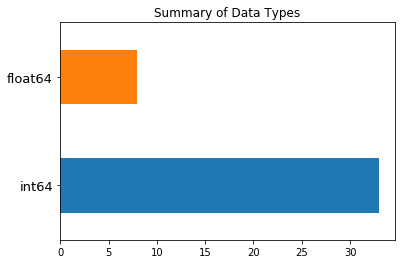

In [7]:
dtype_stats = data.dtypes.value_counts()
dtype_stats.plot(kind='barh');
plt.title('Summary of Data Types');
plt.yticks(fontsize=13);

#### Check the count of different values present inside every feature to understand the redundancy in the dataset...

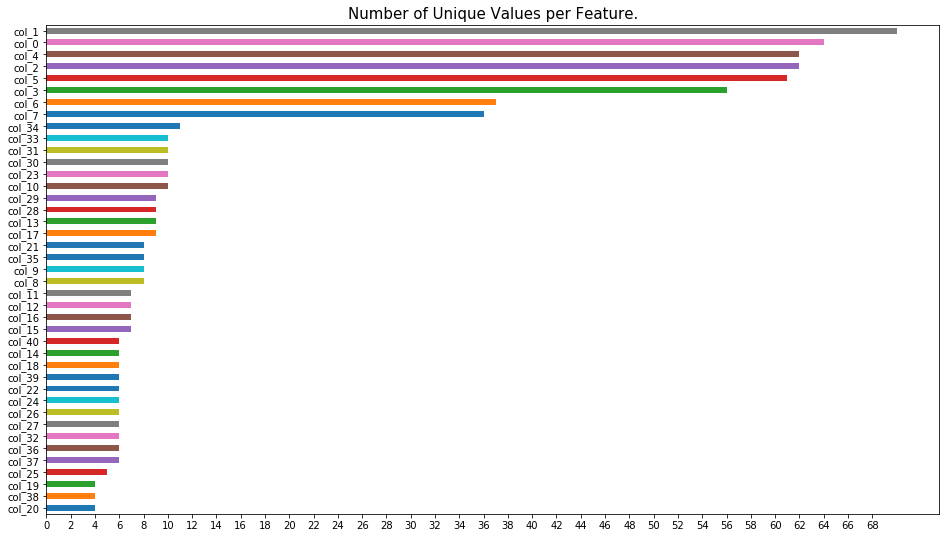

In [8]:
data.apply(lambda x : x.nunique(), axis=0).sort_values(ascending=True).plot(kind='barh', figsize=(16,9));
plt.xticks(range(0, 70, 2));
plt.title('Number of Unique Values per Feature.', fontsize=15);

#### Check for Missing values in the dataset....

In [9]:
print('The Dataset contains %s missing Values.' %(data.isnull().sum().sum()))

The Dataset contains 0 missing Values.


#### Check for Multicollinearity

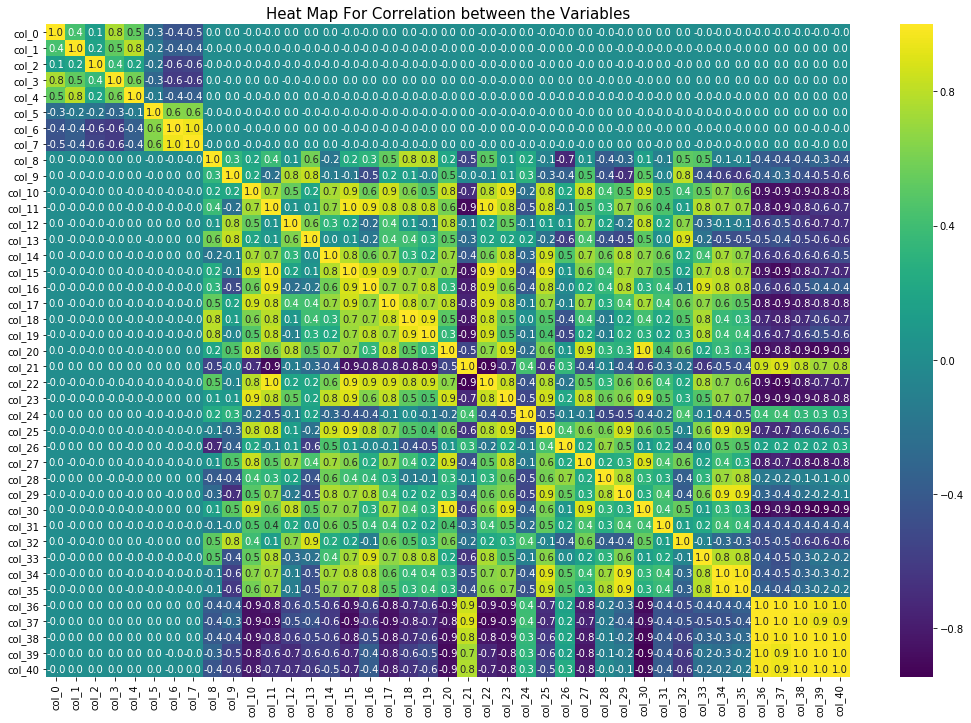

In [10]:
## lets check the correlation between features...

fig = plt.figure(figsize=(18, 12))
## plot the person correlation matrix..
sns.heatmap(data.corr('pearson'), cmap='viridis', annot=True, fmt='0.1f');
plt.title('Heat Map For Correlation between the Variables', fontsize=15);

#### Understanding the Distributional Difference per Class for all Variables

This will help us understand, which variables can have better classification characteristics.

##### Box Plots

In [11]:
## lets understand the distribution of the variables using box-plots...

## create boxplots for each feature showing the distributions for both the classes..

def box_plot(data, target):
    for col in data.columns:
        if col != 'col_41': ## this is the target variable, hence excluded...
            fig = plt.figure(figsize=(10,6))
            sns.boxplot(x=target, y=col, data=data) 

C:\Users\uanurag\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



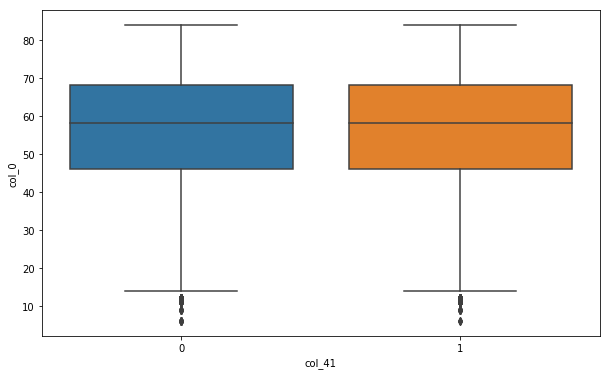

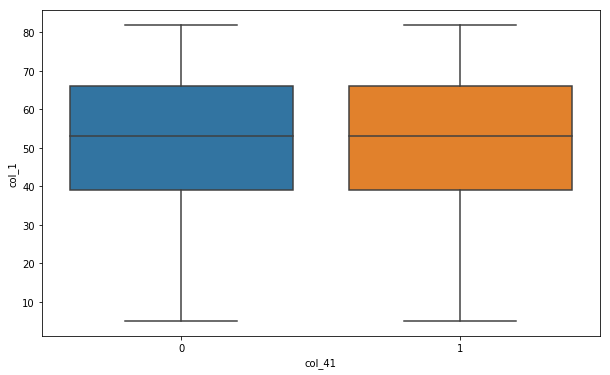

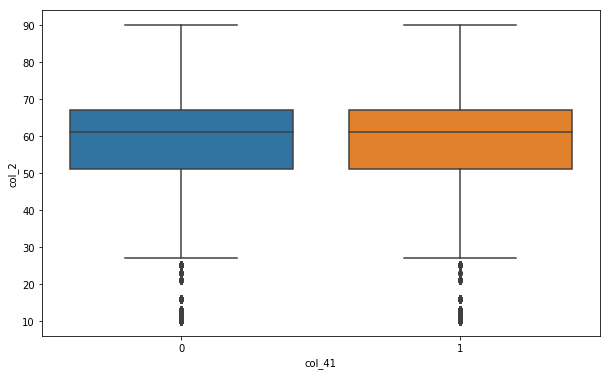

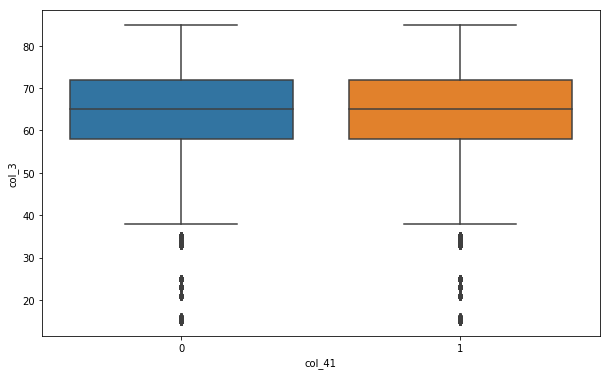

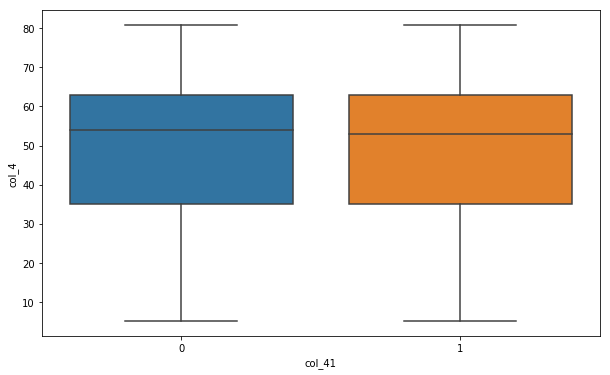

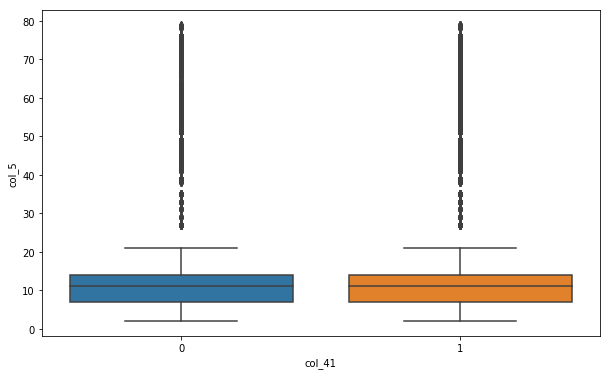

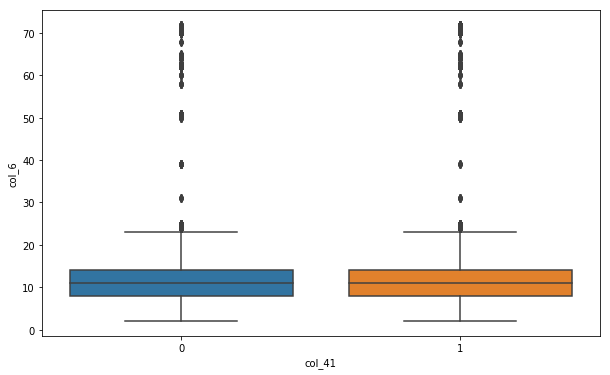

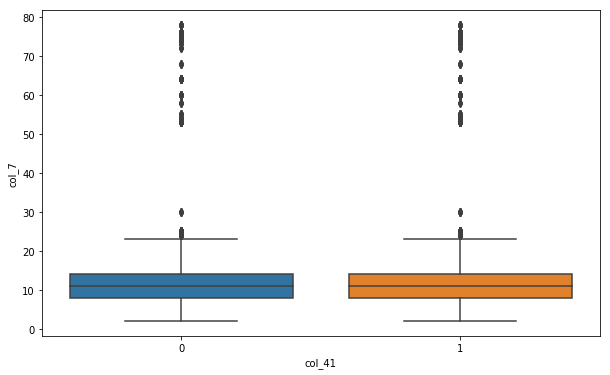

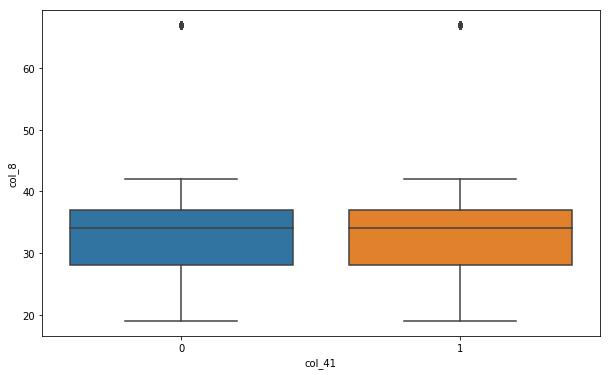

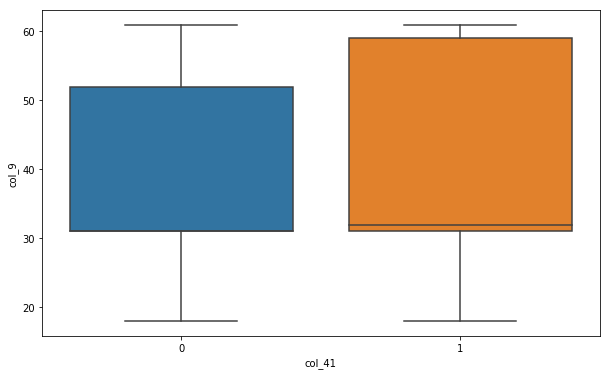

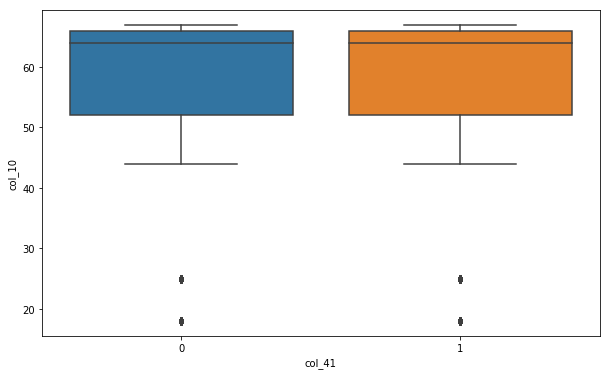

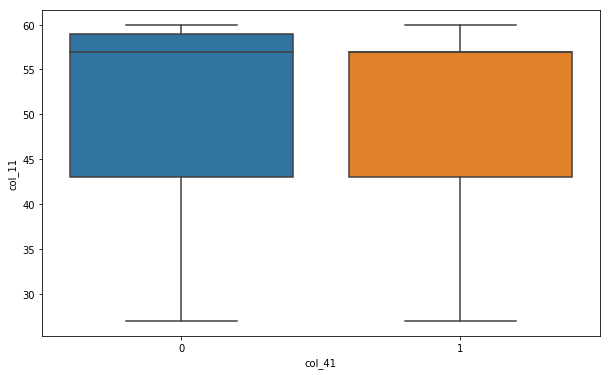

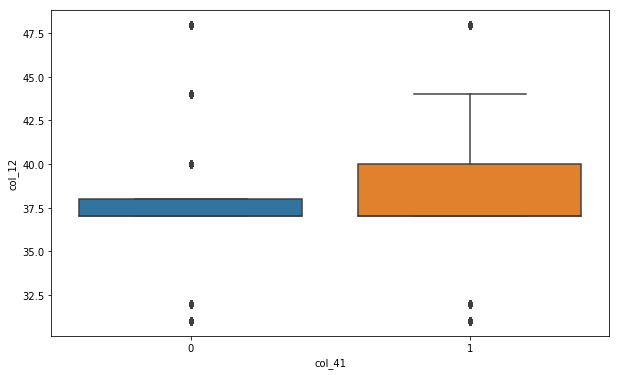

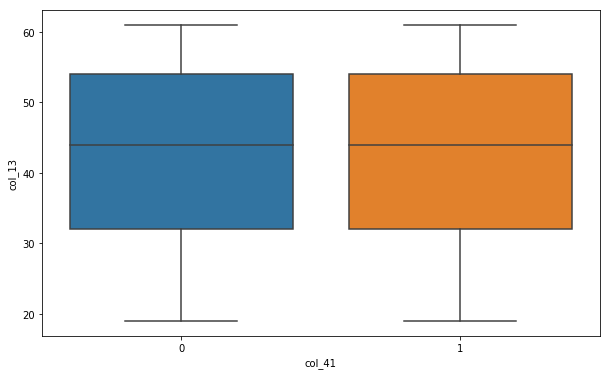

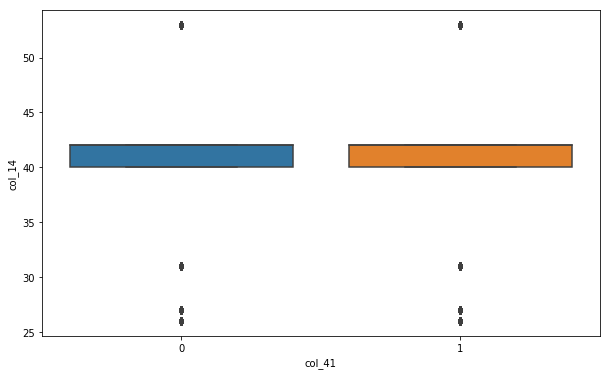

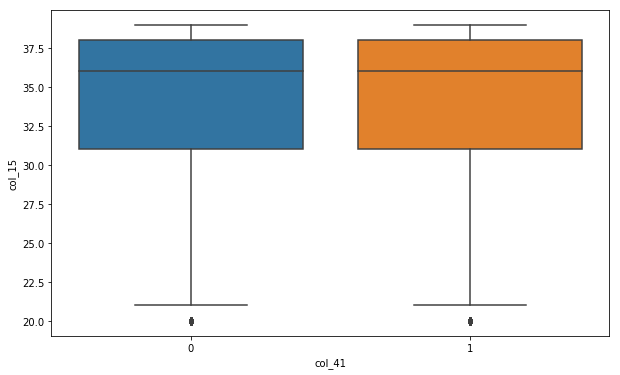

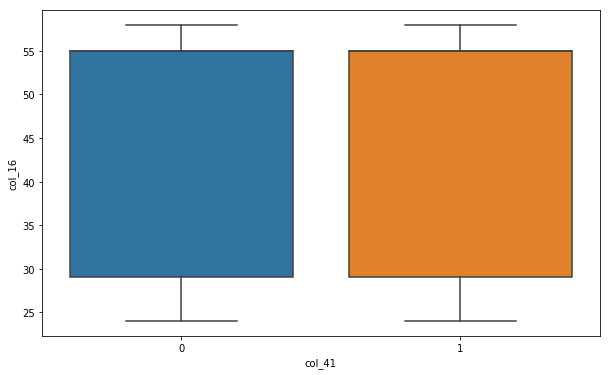

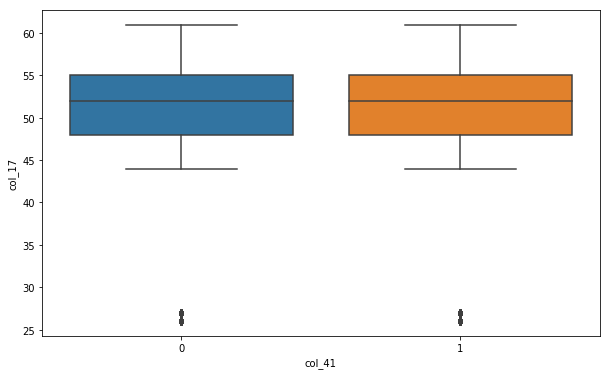

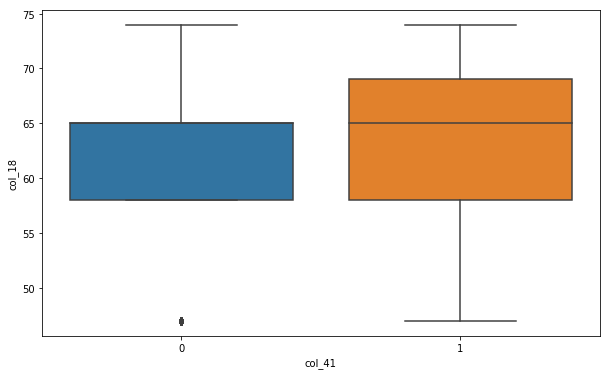

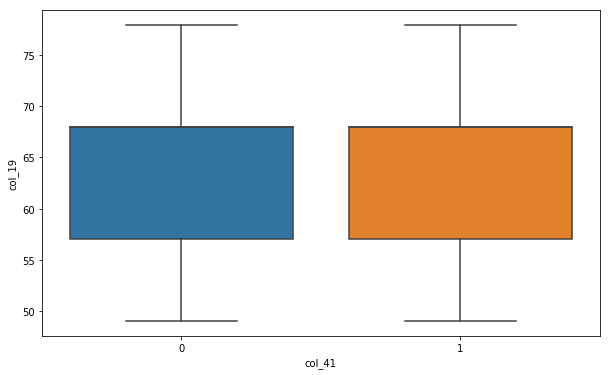

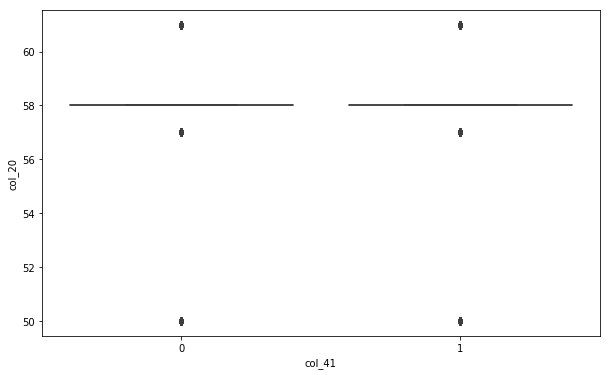

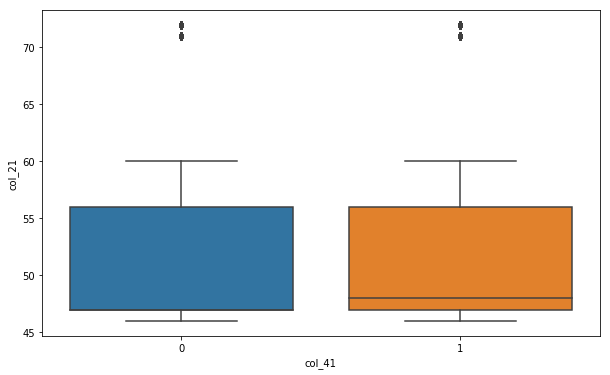

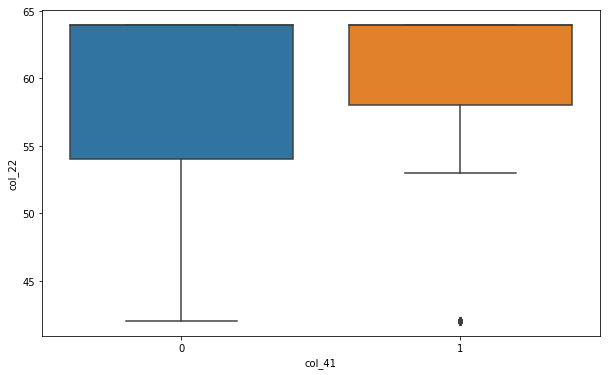

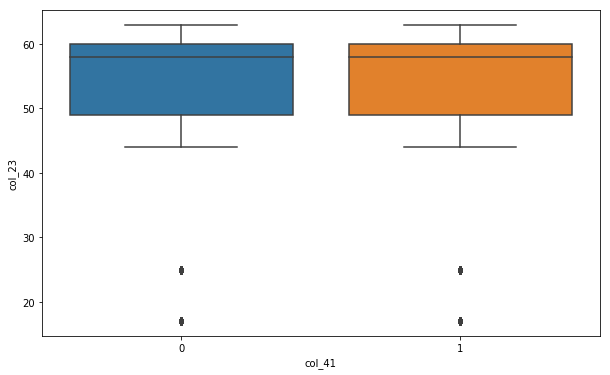

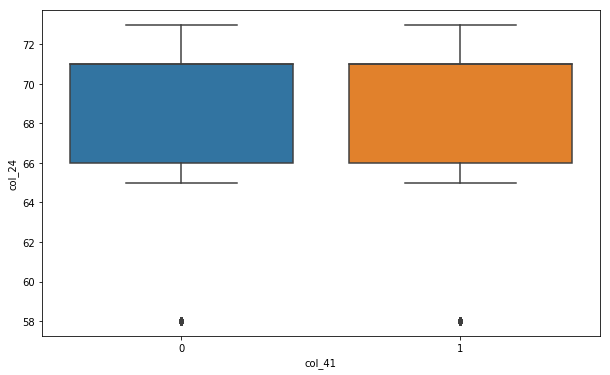

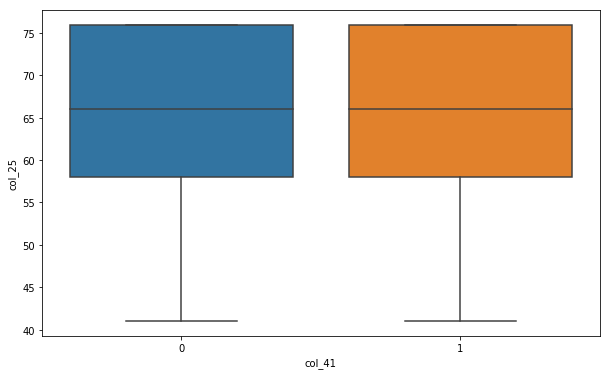

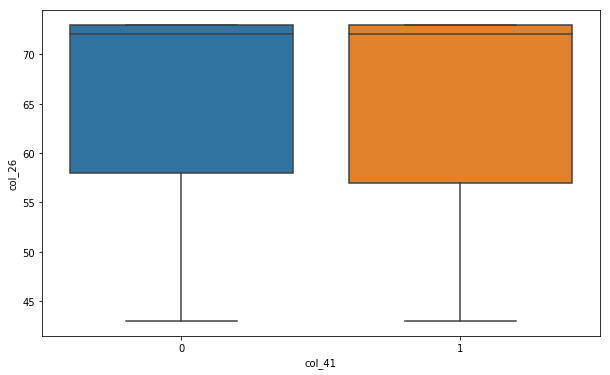

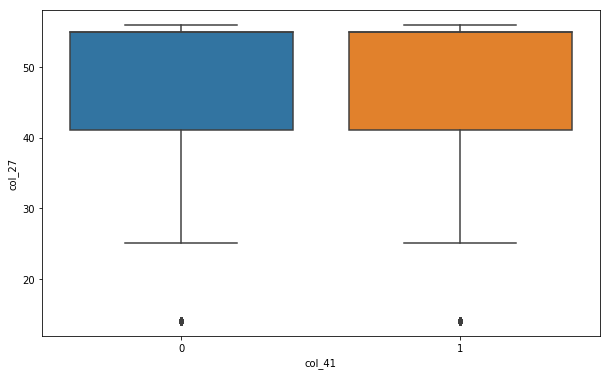

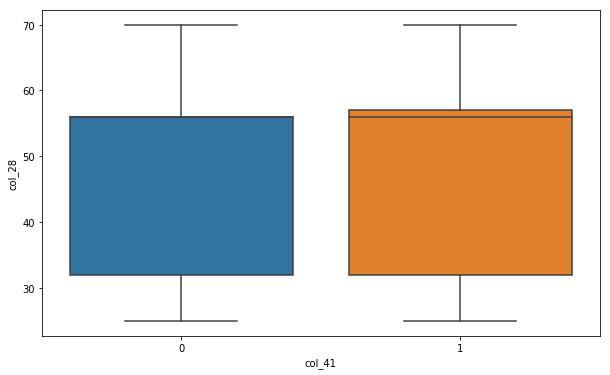

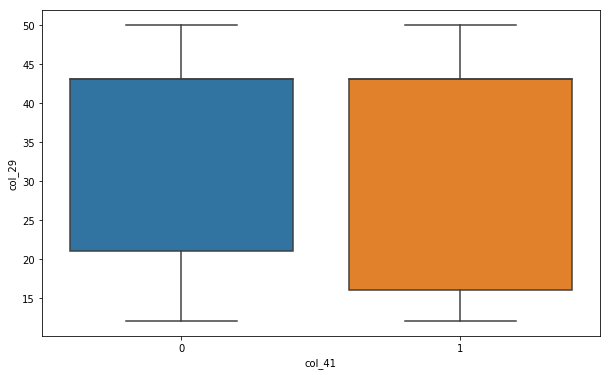

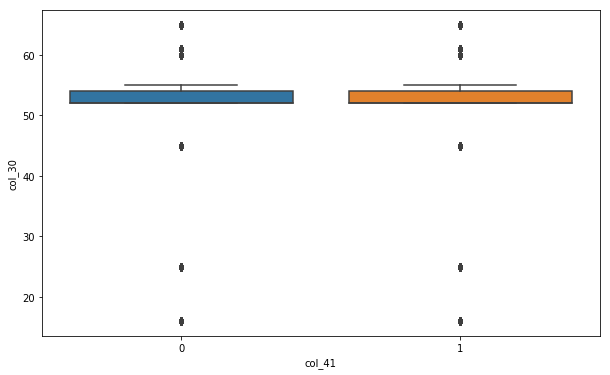

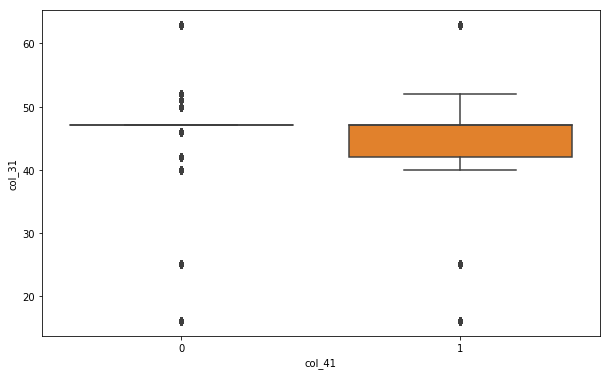

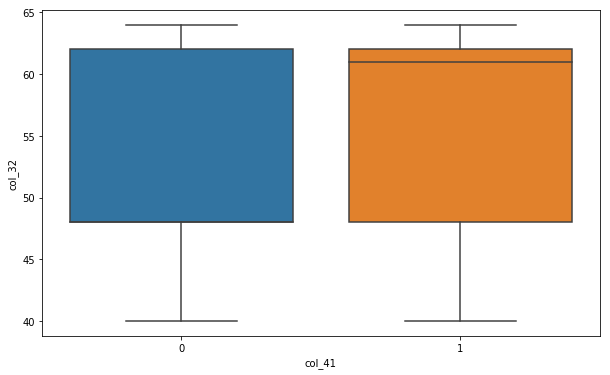

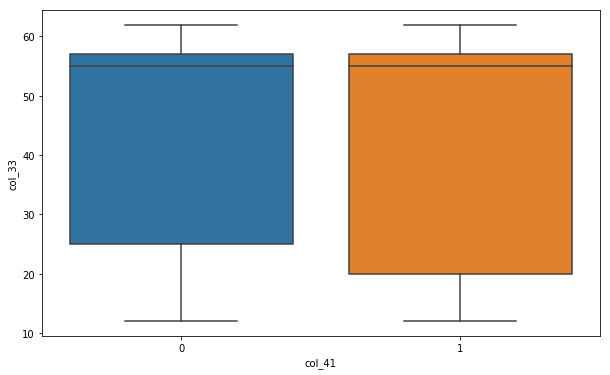

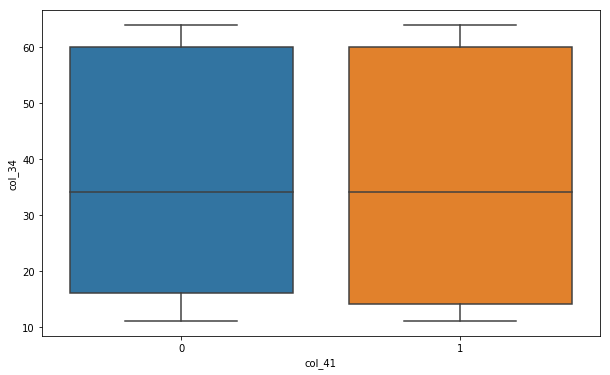

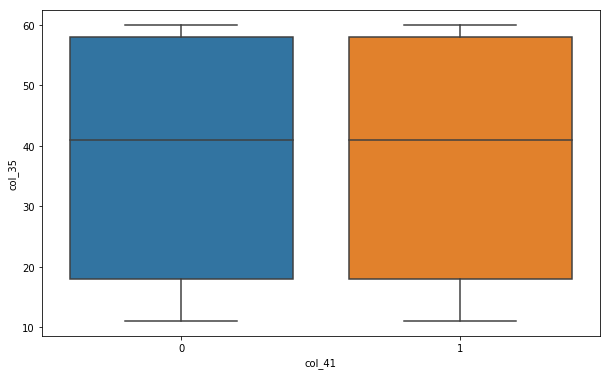

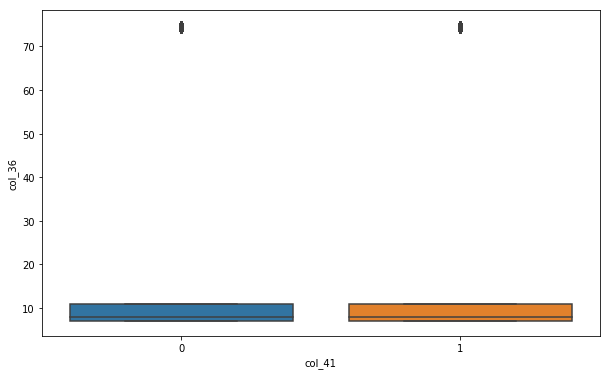

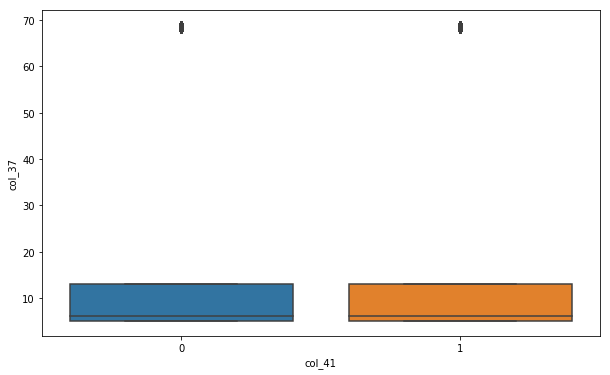

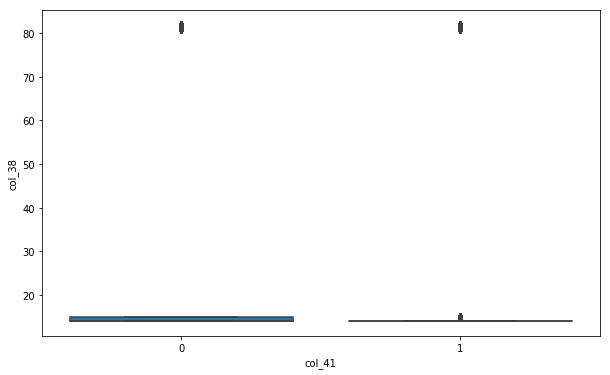

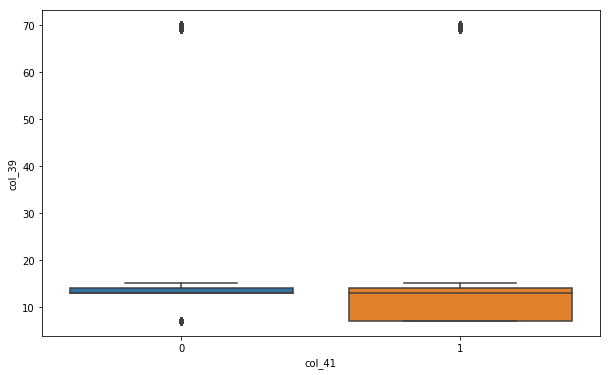

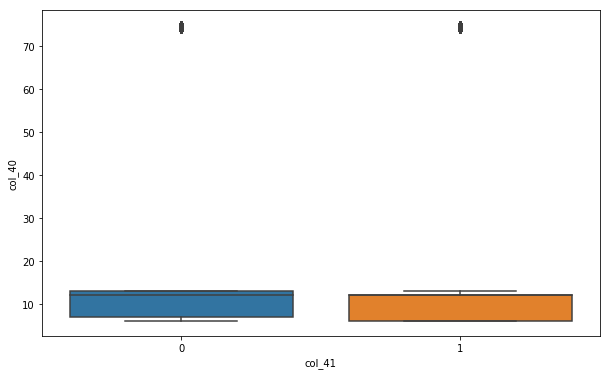

In [12]:
box_plot(data, target)

##### Kernel Density Estimate (KDE) Plots

In [13]:
## insert the target to use color code in the plots...

def kde_plot(data, target):
    data.loc[:, 'col_41'] = target
    data_0 = data[data['col_41'] == 0]
    data_1 = data[data['col_41'] == 1]

    for col in data.columns:
        if col != 'col_41':
            fig = plt.figure(figsize=(10,6))
            sns.distplot(data_0[col],  hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='Class 0')
            sns.distplot(data_1[col],  hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='Class 1')
            plt.title('Density Estimation for %s' %col)
            plt.ylabel('Density', fontsize=12);
            plt.xlabel(col, fontsize=12);
            plt.legend(prop={'size': 12}, title='Target Value');

    ## drop the target column...
    data.drop('col_41', axis=1, inplace=True)
    del data_0, data_1

C:\Users\uanurag\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\uanurag\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



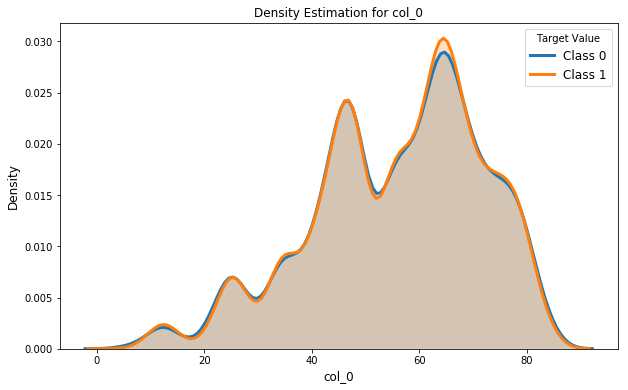

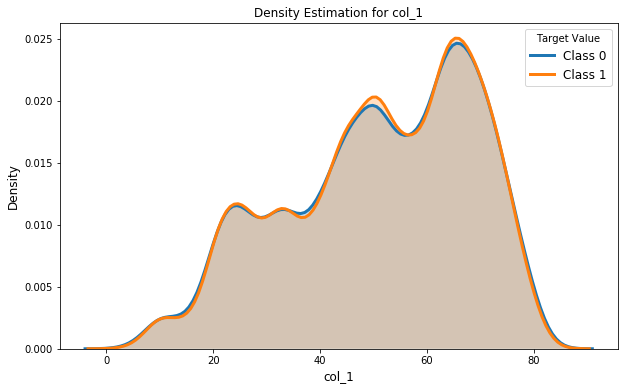

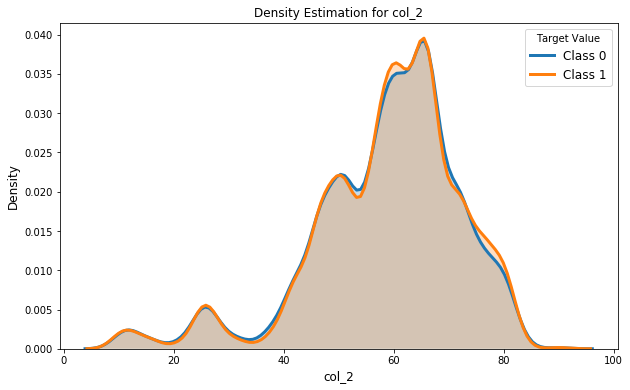

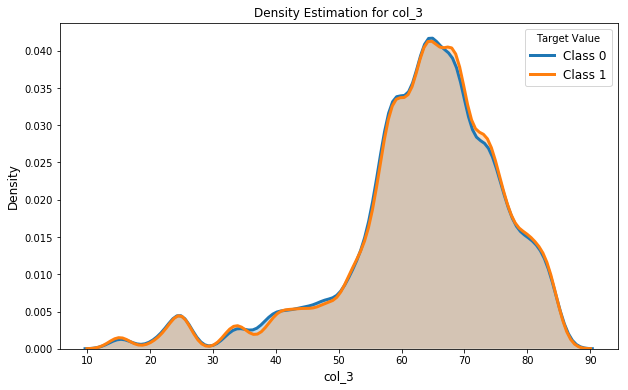

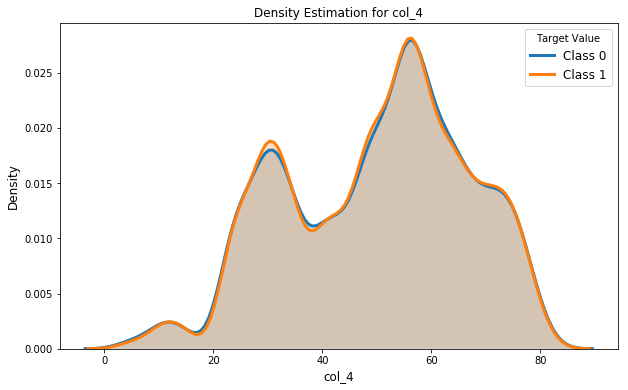

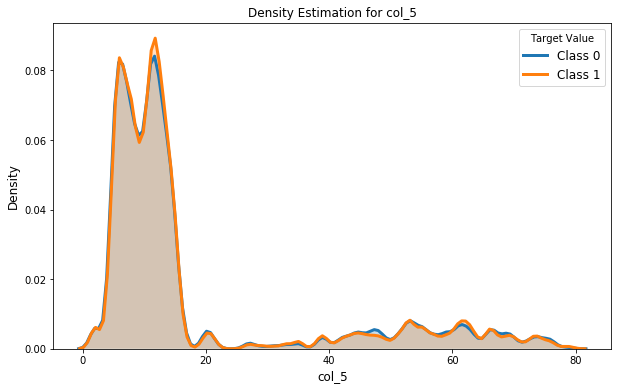

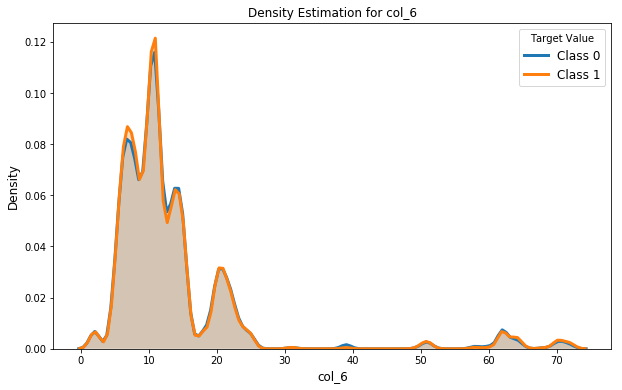

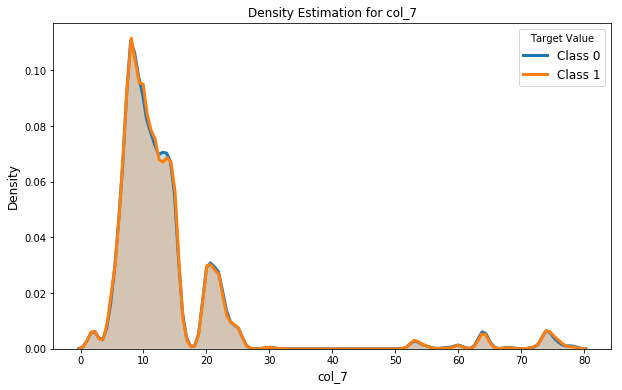

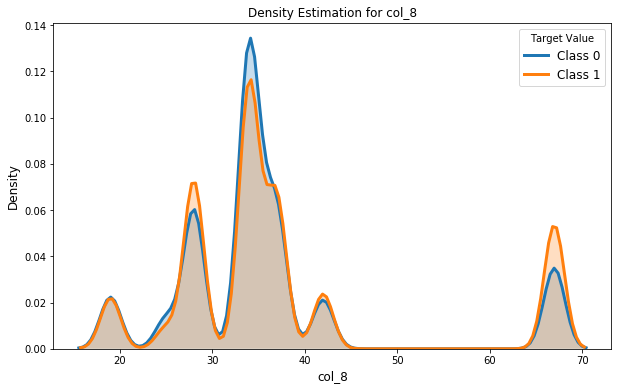

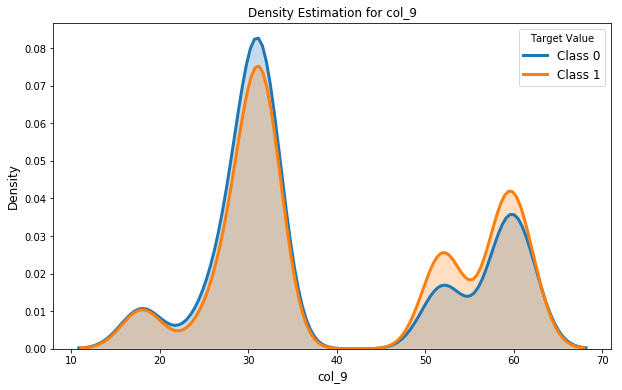

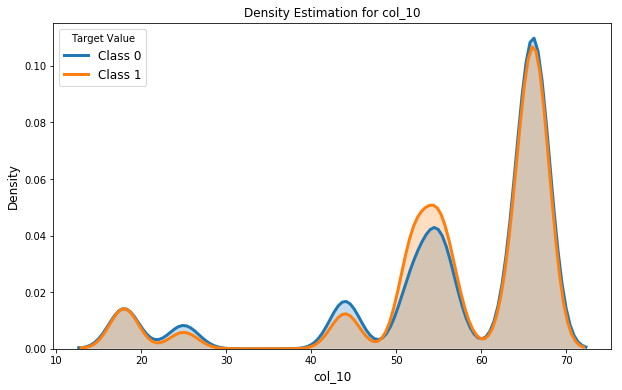

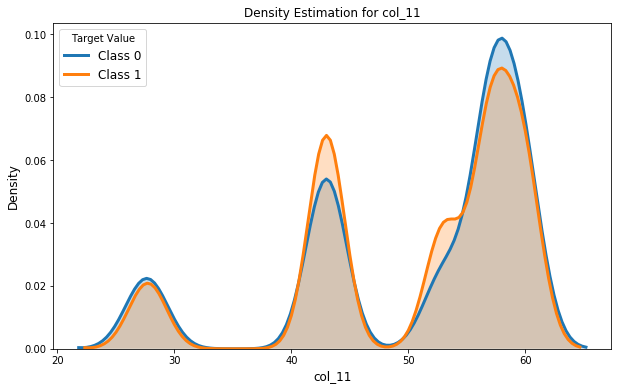

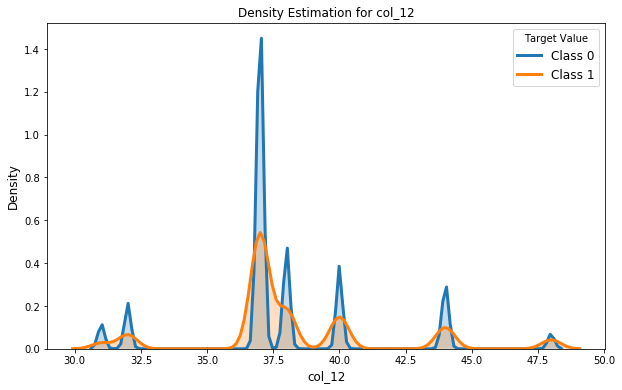

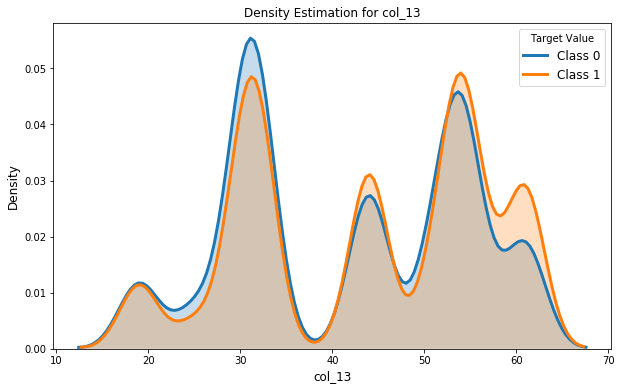

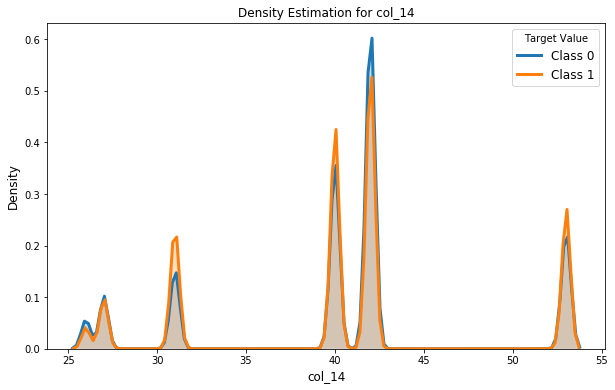

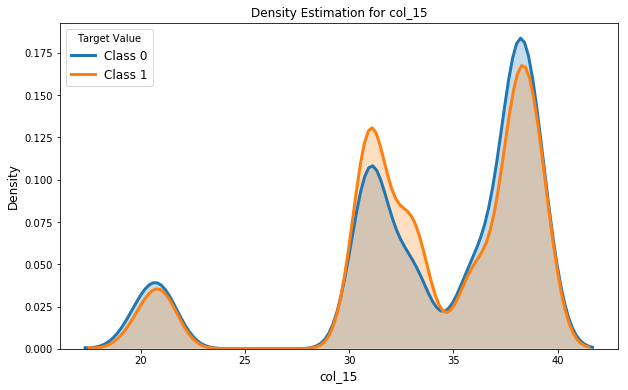

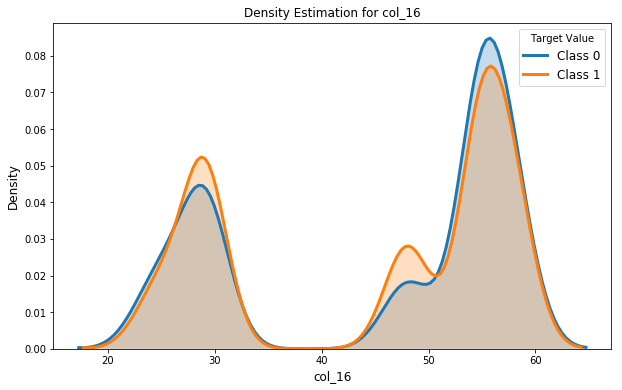

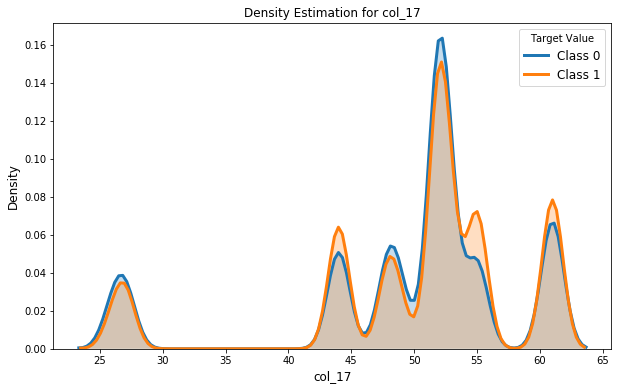

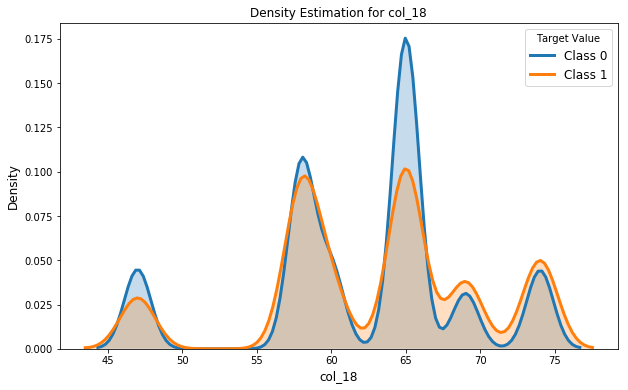

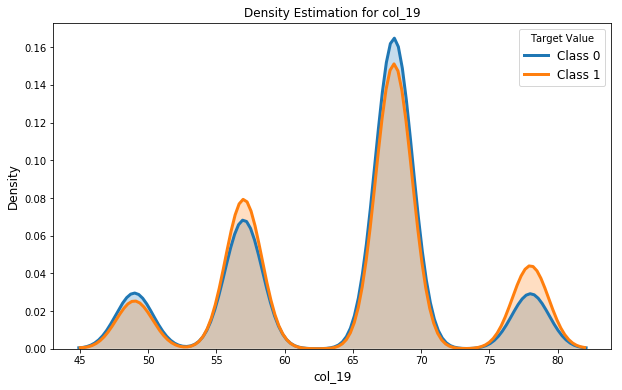

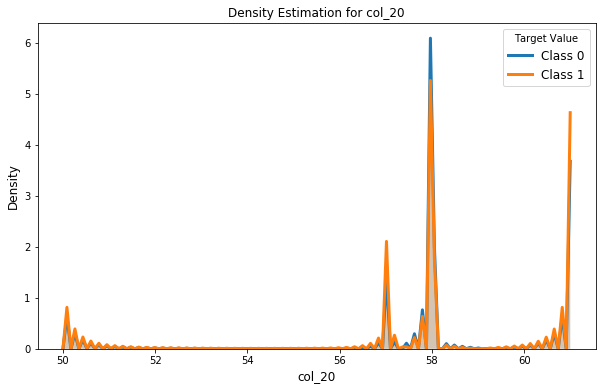

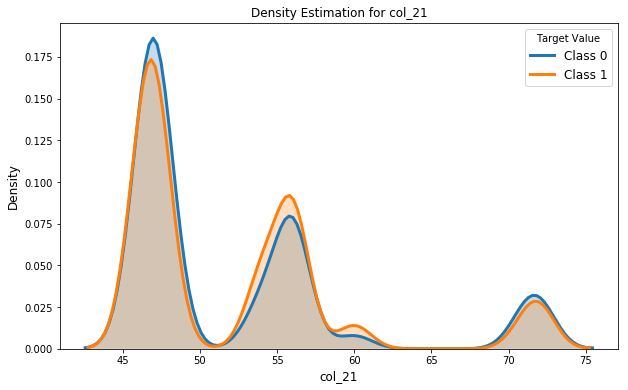

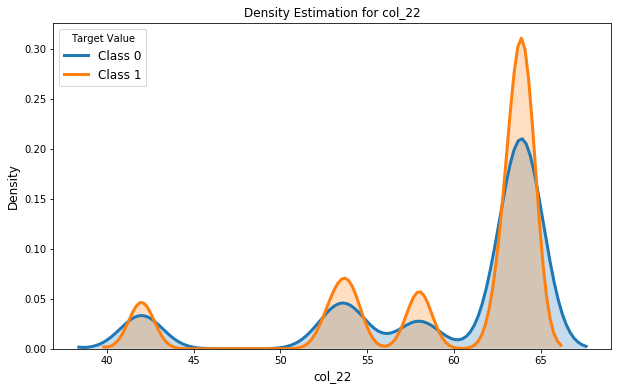

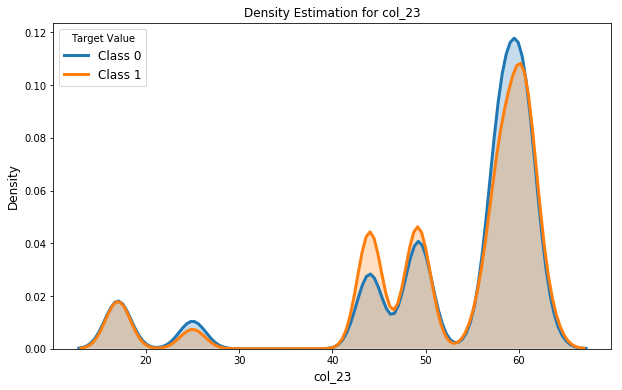

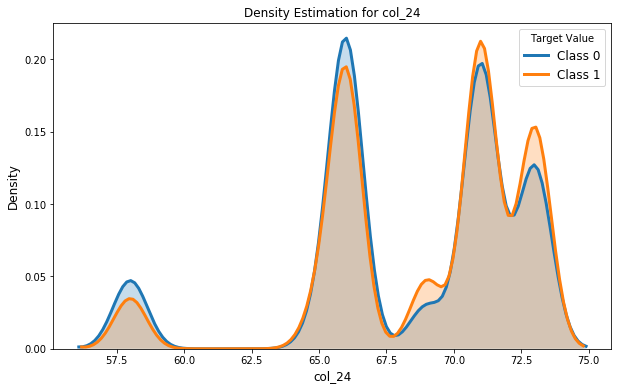

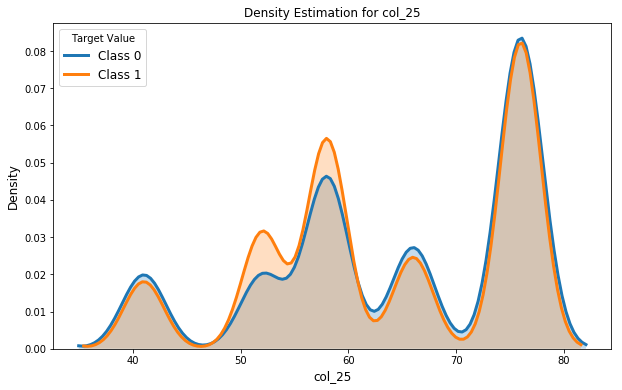

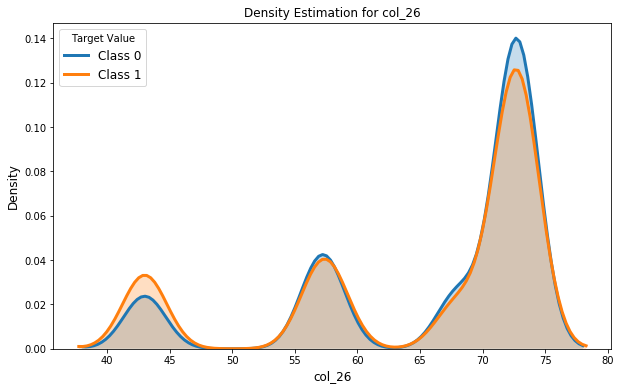

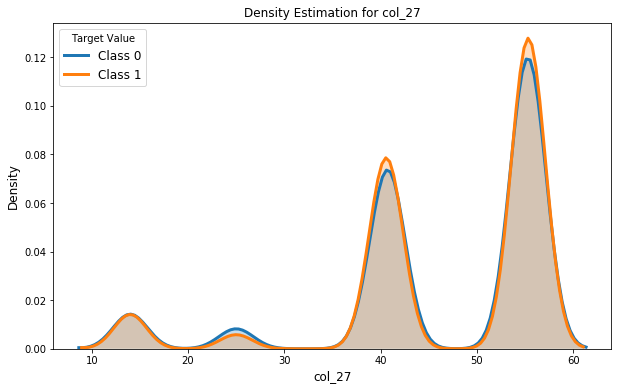

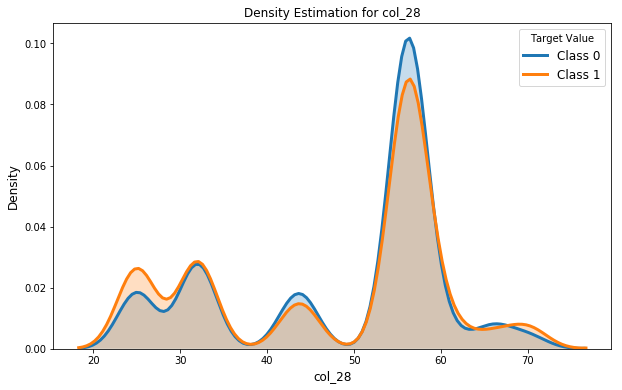

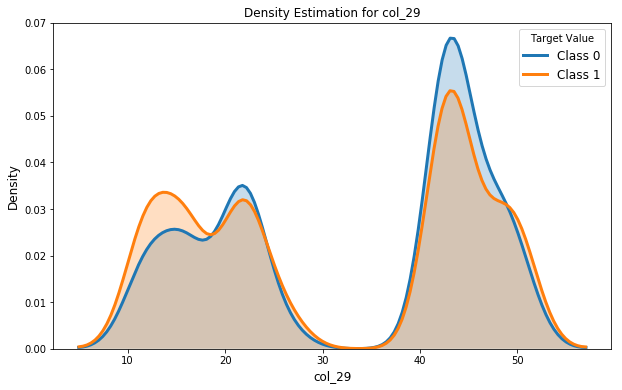

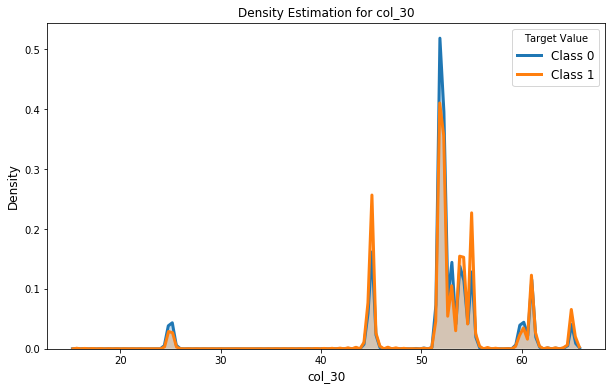

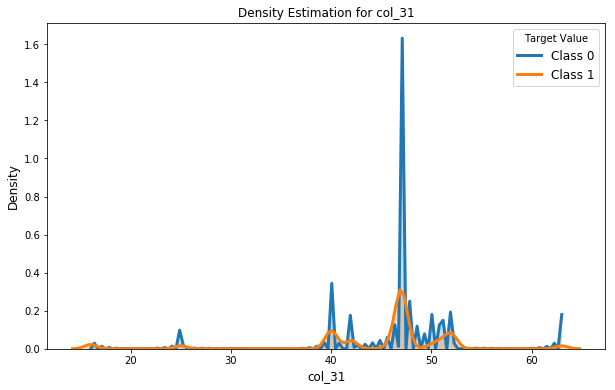

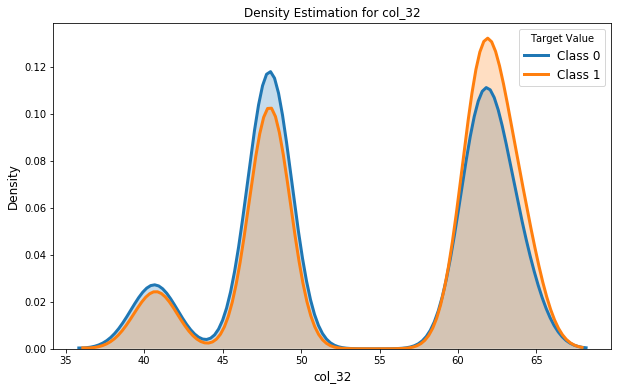

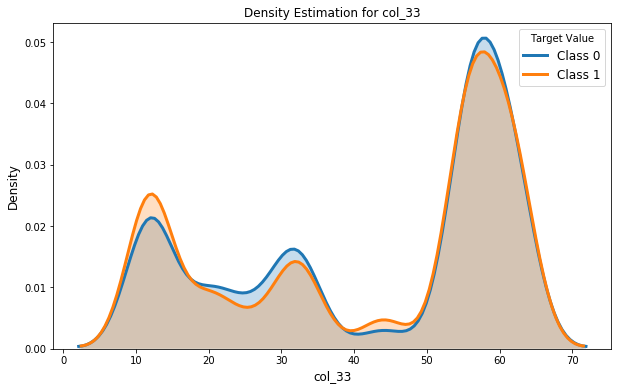

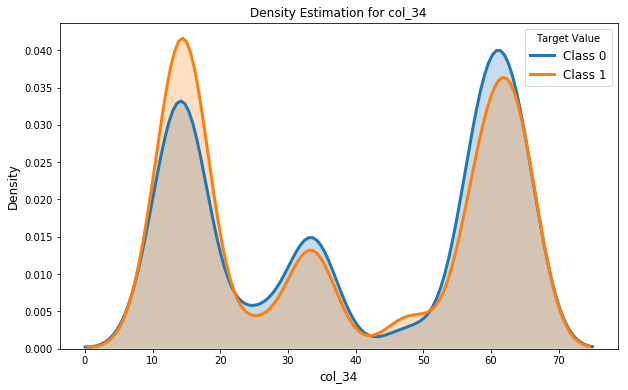

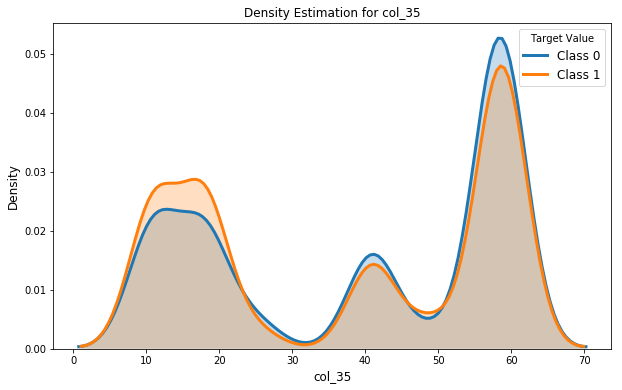

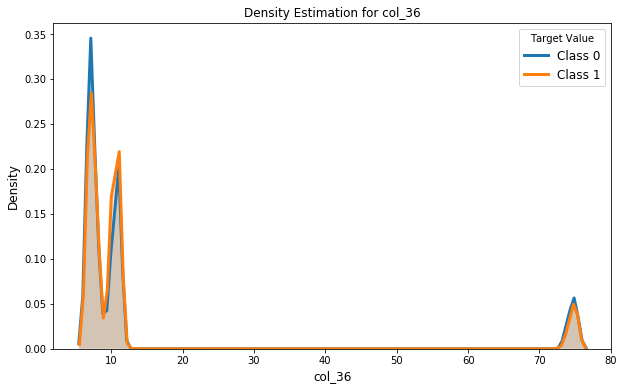

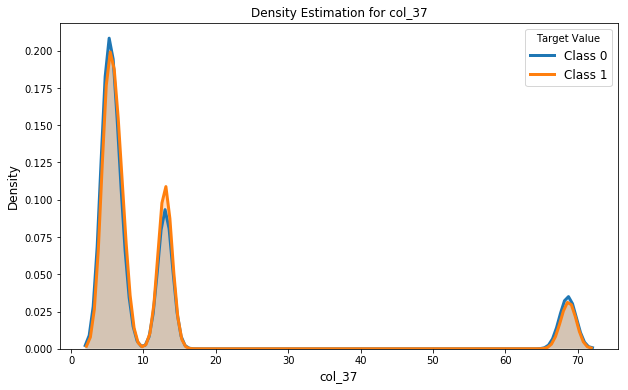

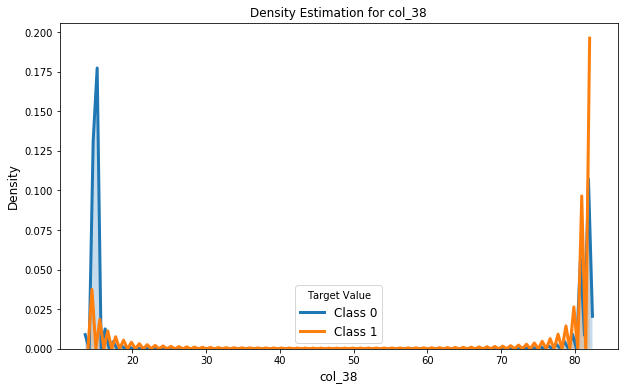

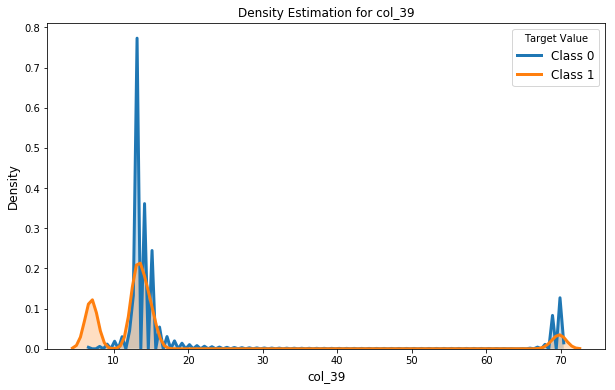

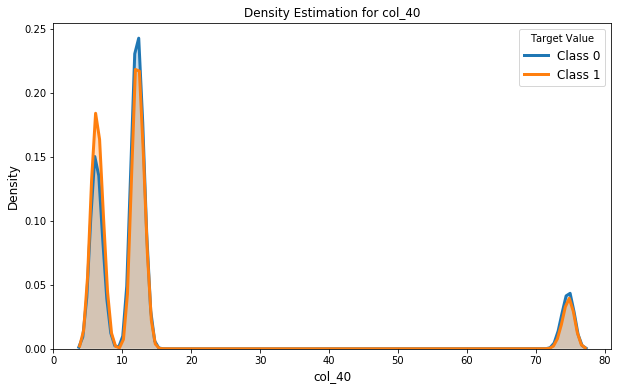

In [14]:
kde_plot(data, target)

#### Outlier Removal

From the Box Plots it appears that there are good amount of outliers in the variables in the dataset. Lets use the following outlier removal technique.



$ Dataset < (Q1 - 1.5 * IQR)  | Dataset > (Q3 + 1.5 * IQR) $

In [15]:
first_quantile = data.quantile(0.25)
third_quantile = data.quantile(0.75)

IQR = third_quantile - first_quantile

## lets use the above formula to remove the outliers and filter the dataset..

clean_data = data[~((data < (first_quantile - 1.5 * IQR)) | (data > (third_quantile + 1.5 * IQR))).any(axis=1)]
clean_data.shape

(7381, 41)

##### Box Plot After Outlier Removal

C:\Users\uanurag\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



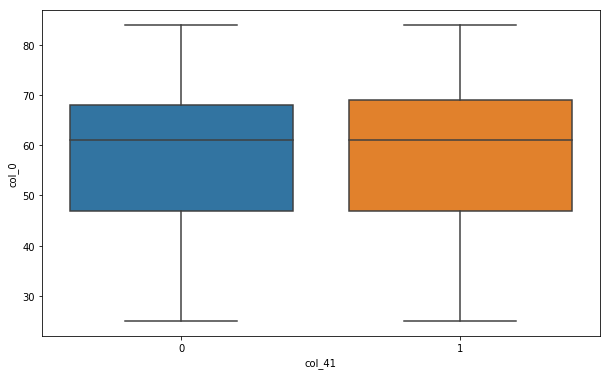

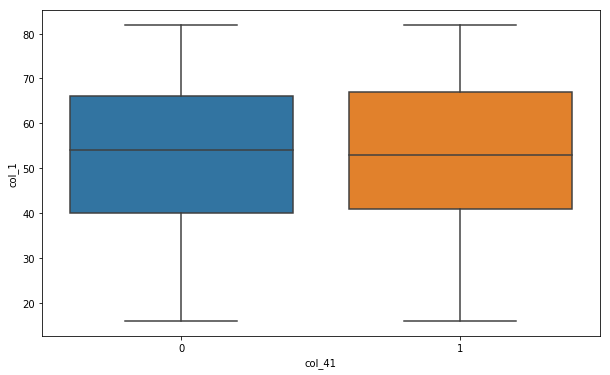

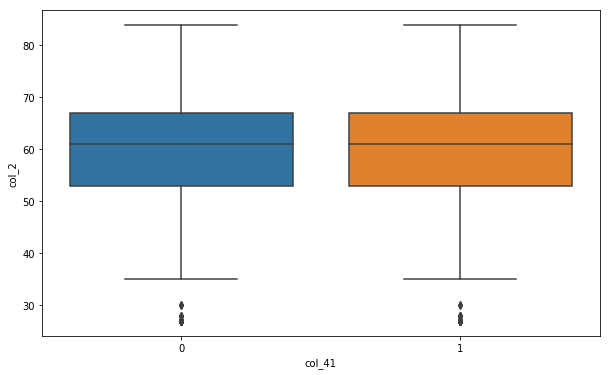

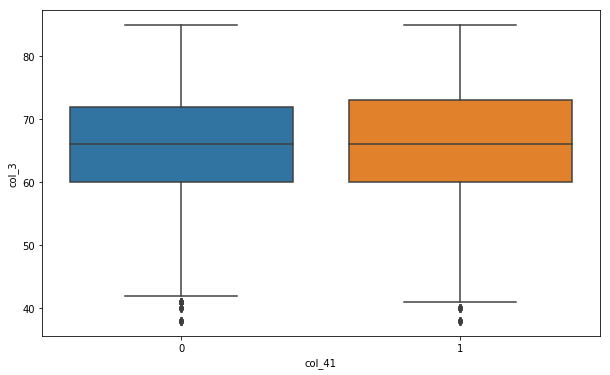

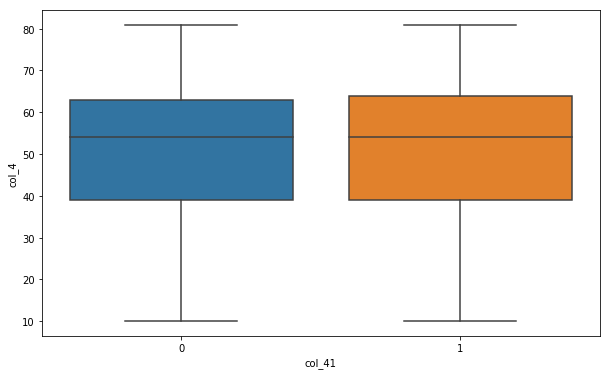

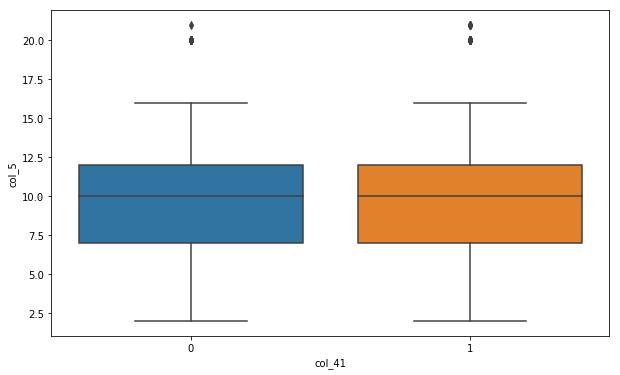

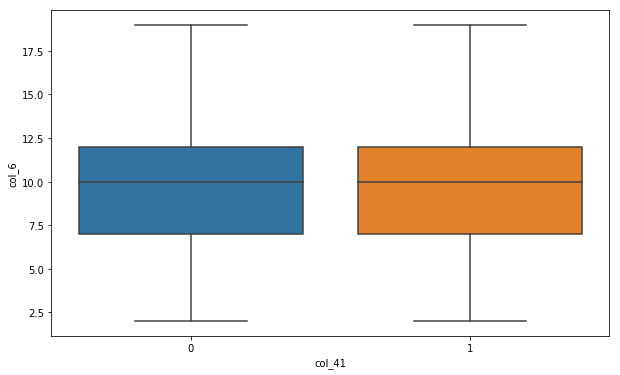

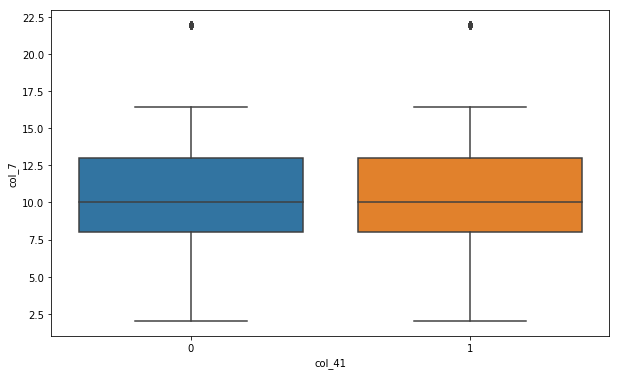

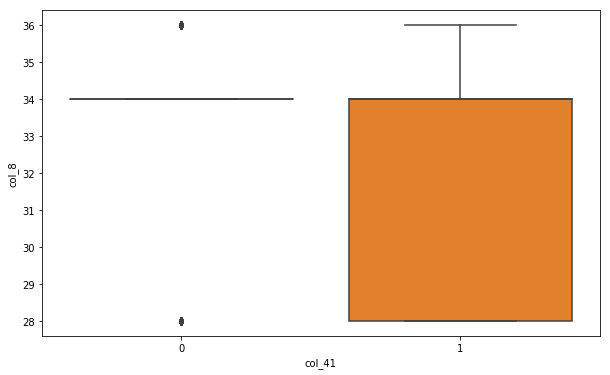

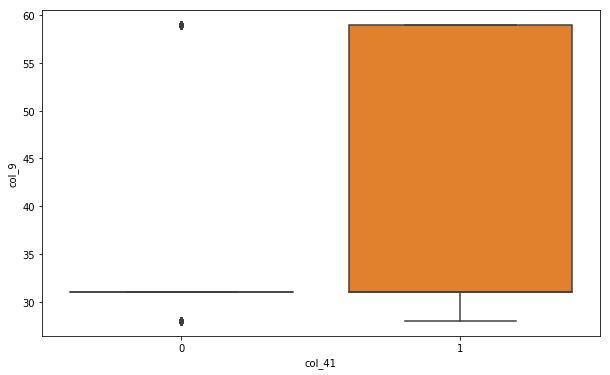

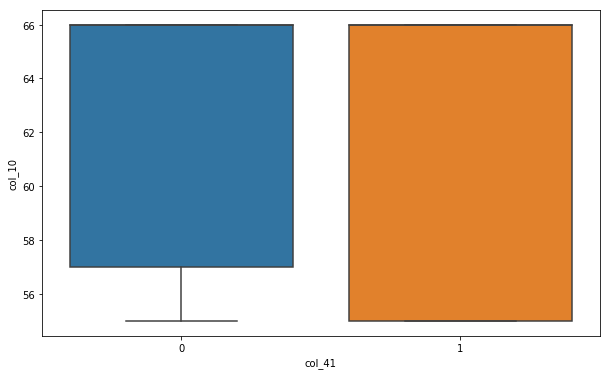

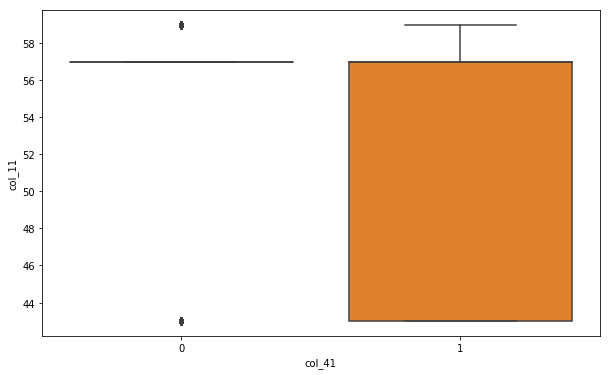

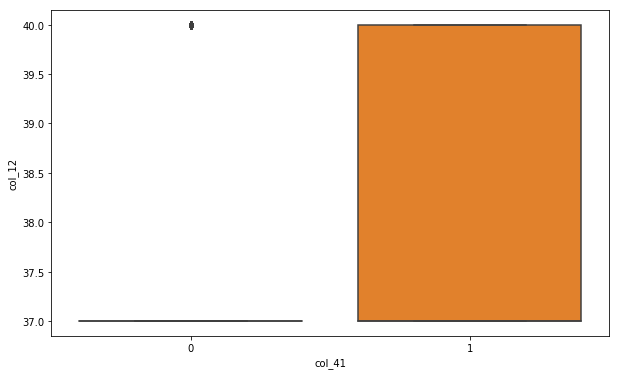

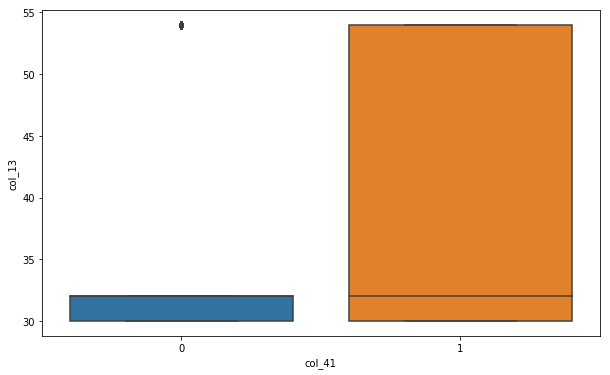

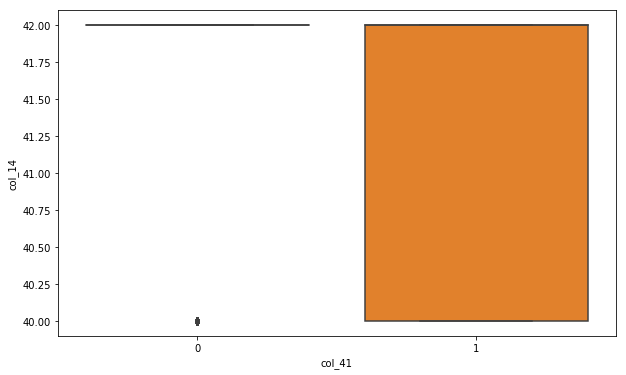

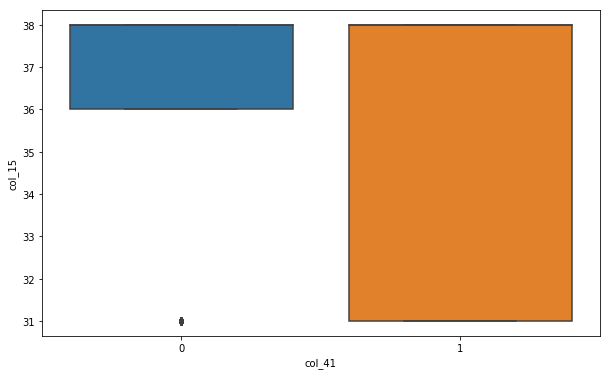

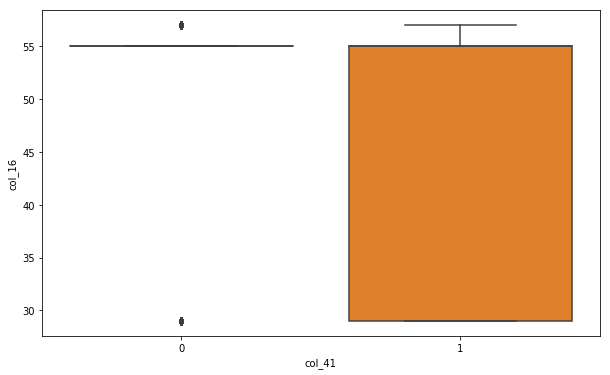

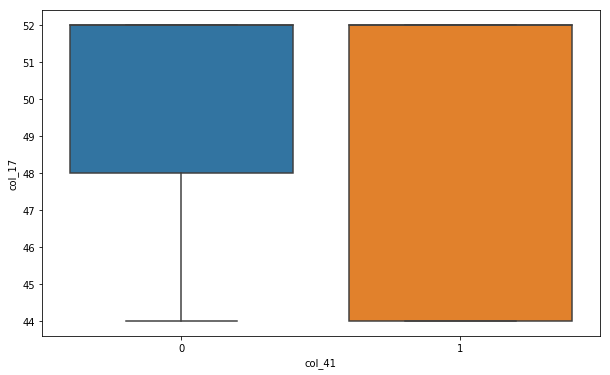

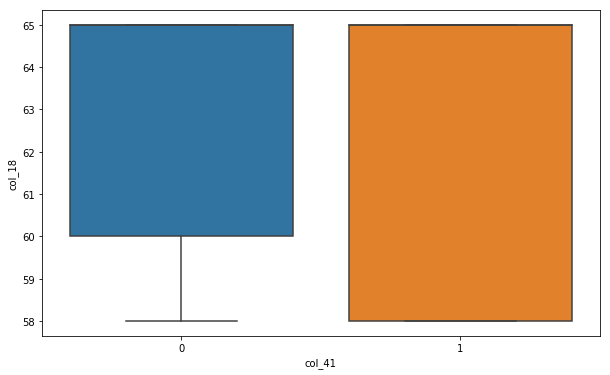

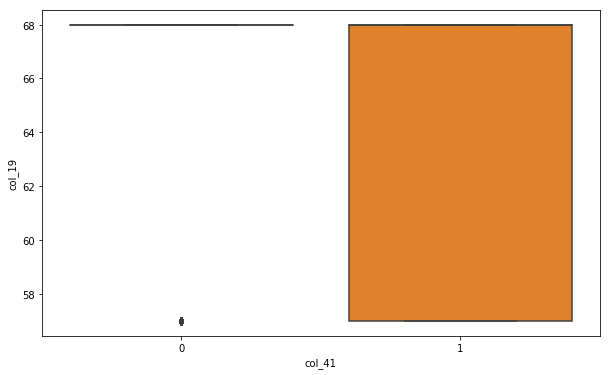

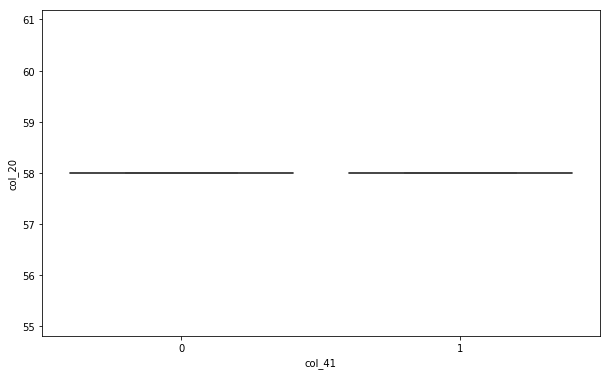

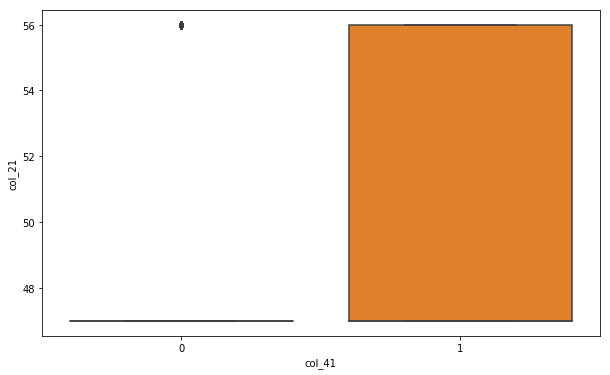

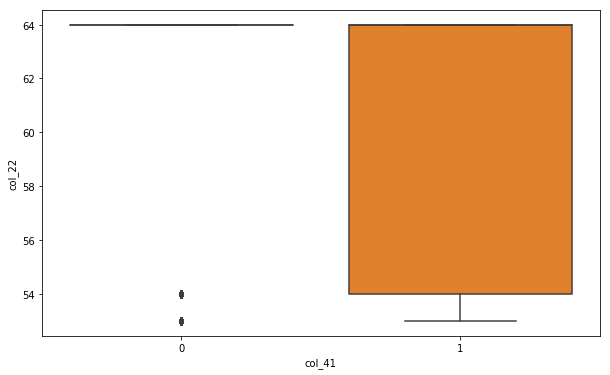

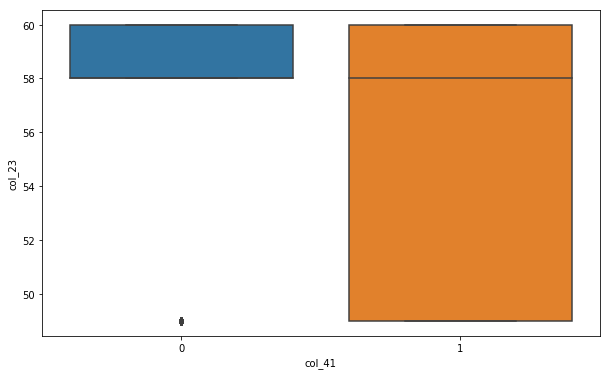

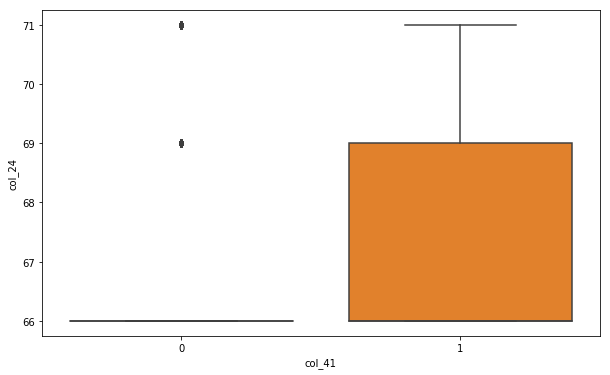

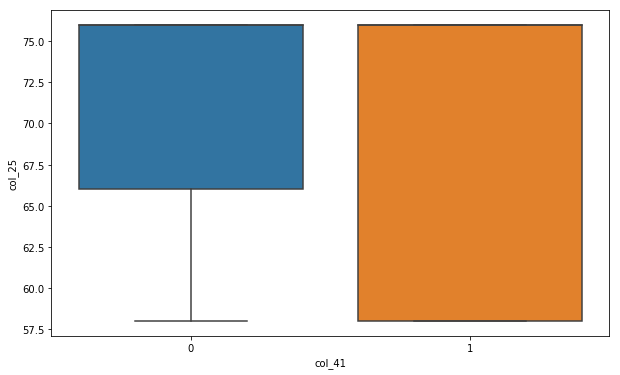

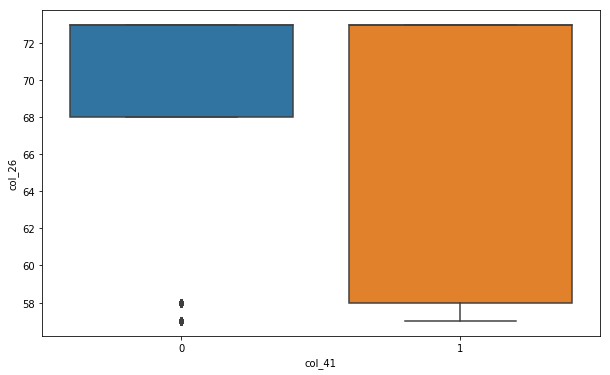

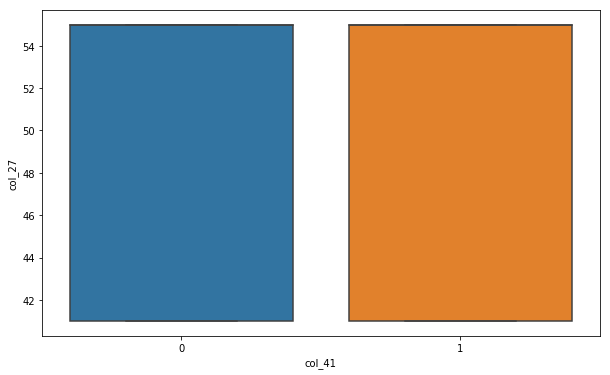

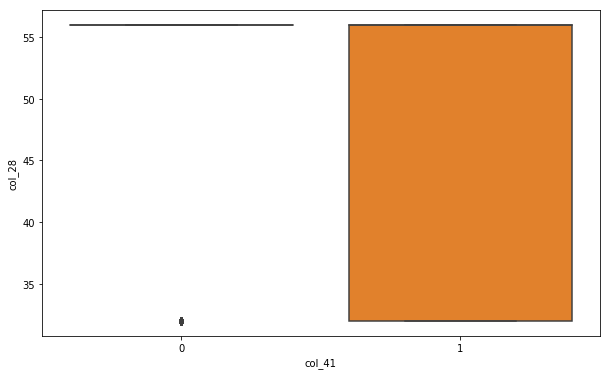

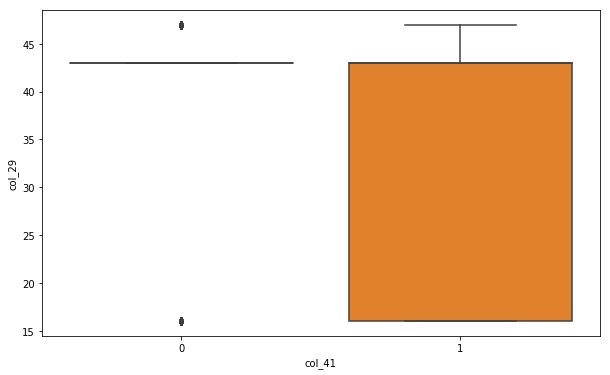

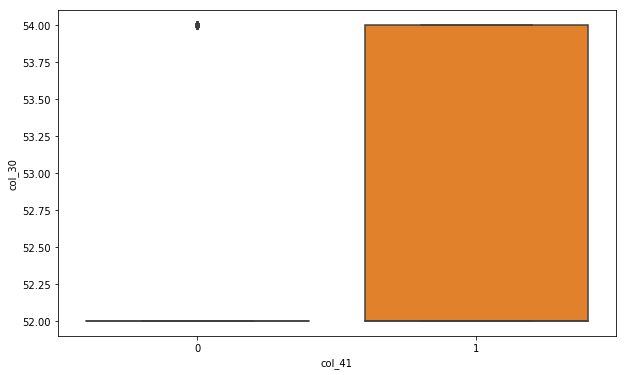

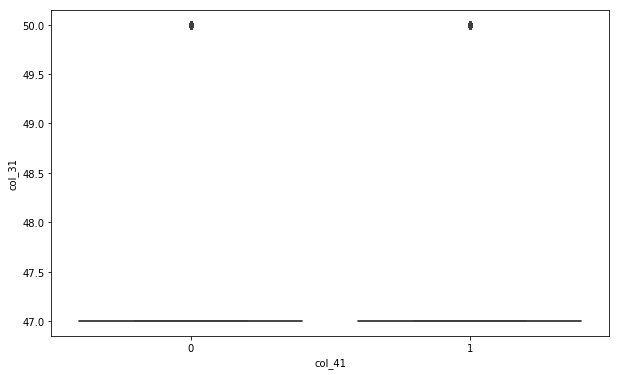

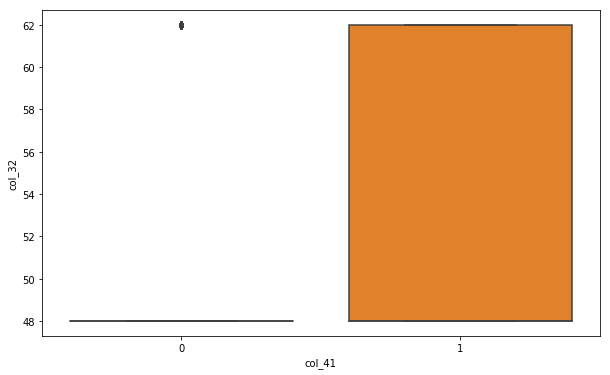

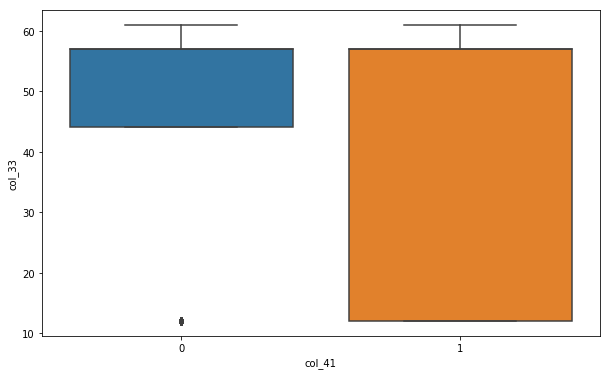

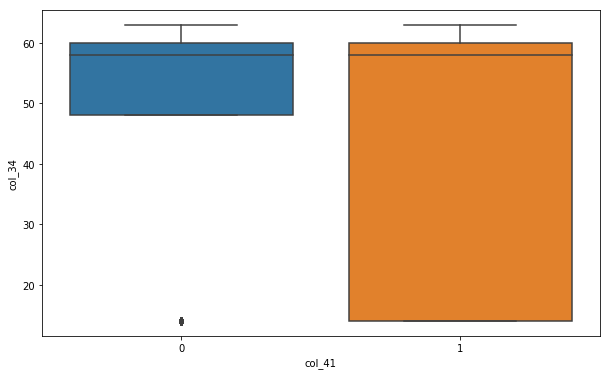

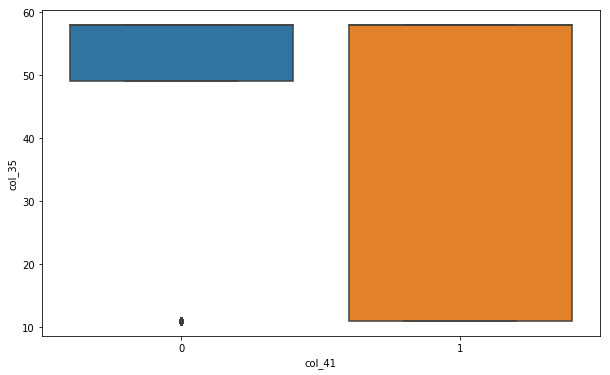

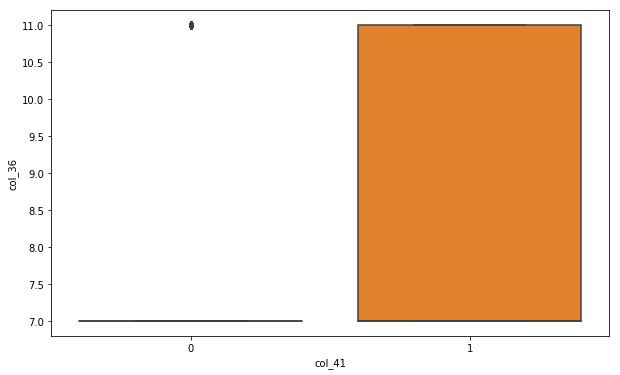

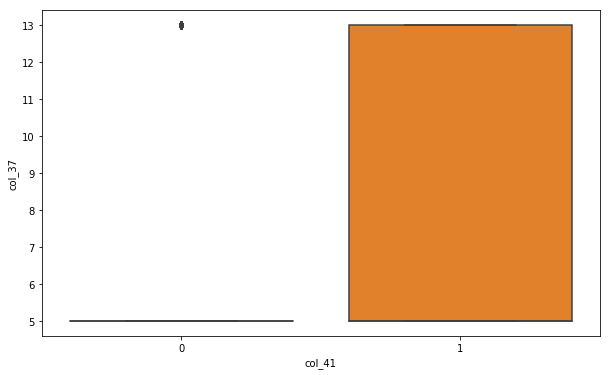

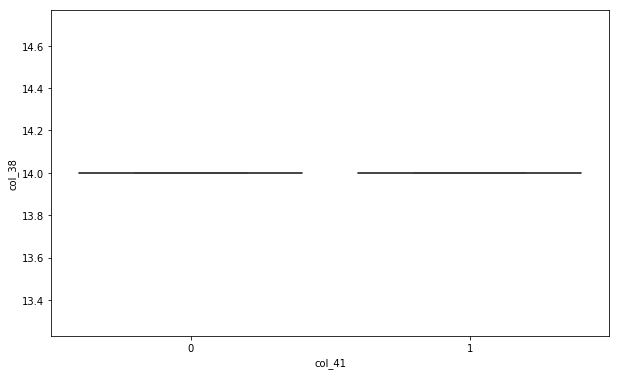

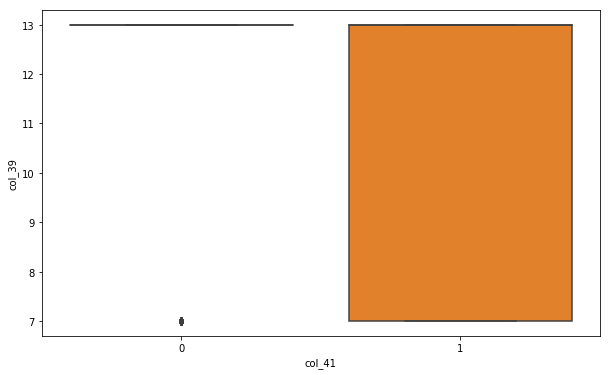

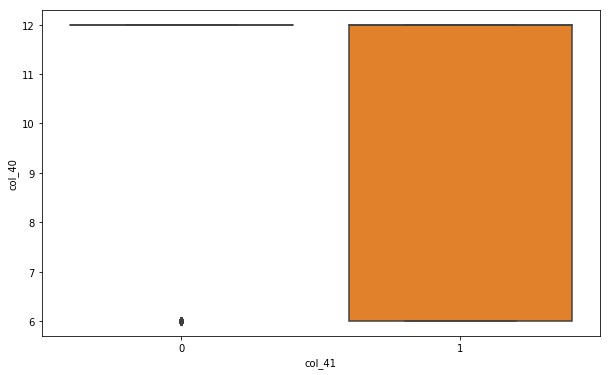

In [16]:
box_plot(clean_data, target)

C:\Users\uanurag\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\uanurag\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\uanurag\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be in

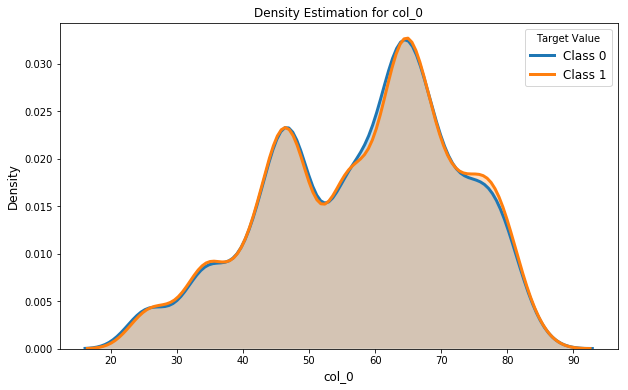

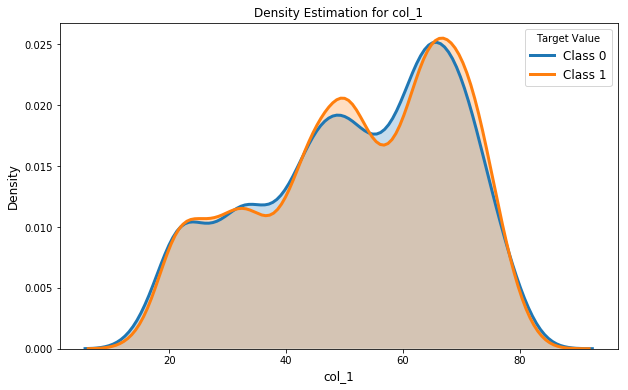

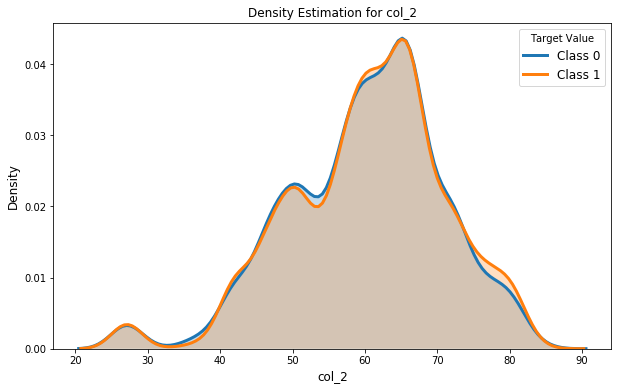

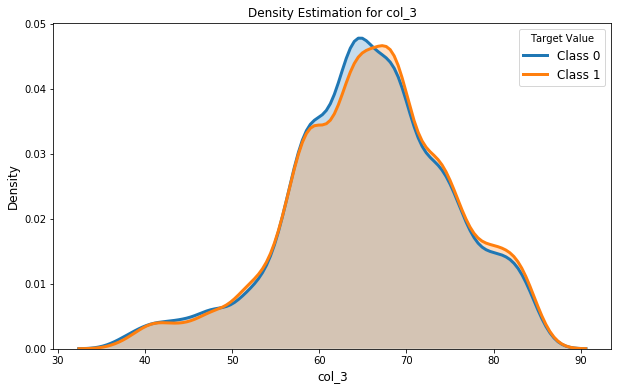

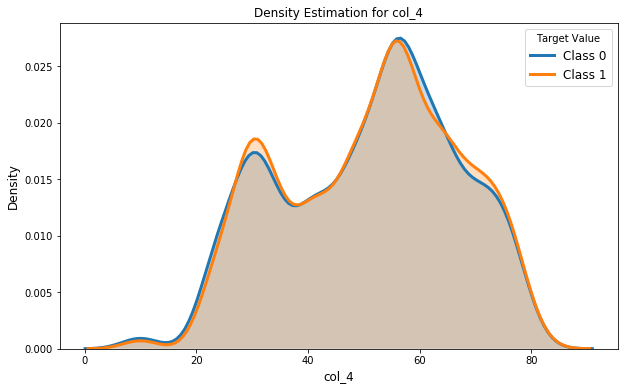

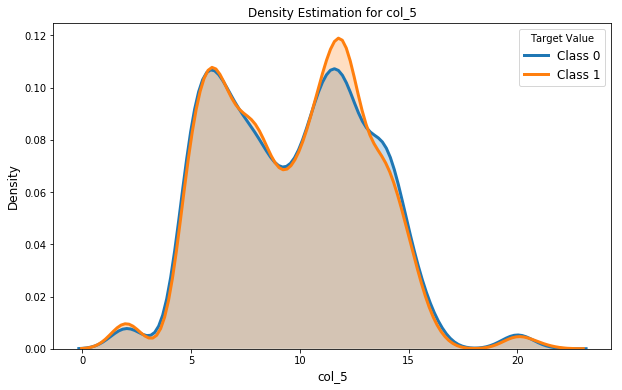

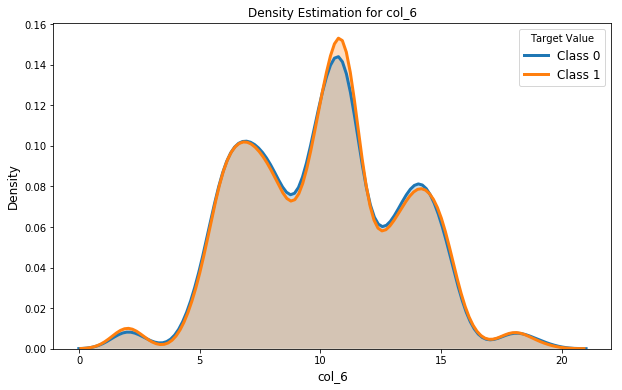

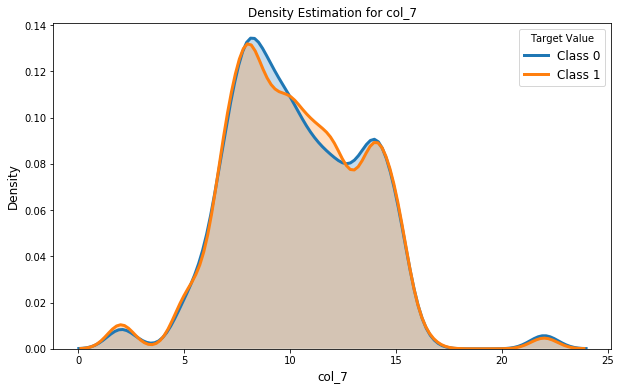

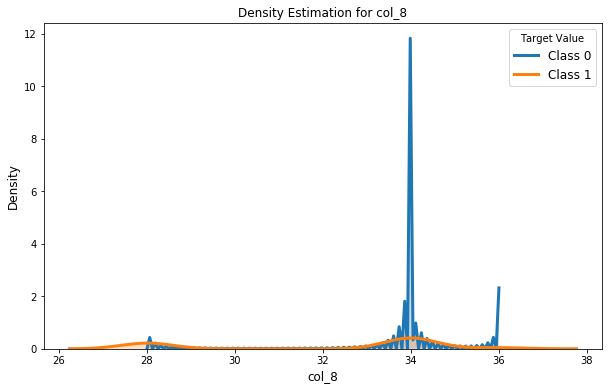

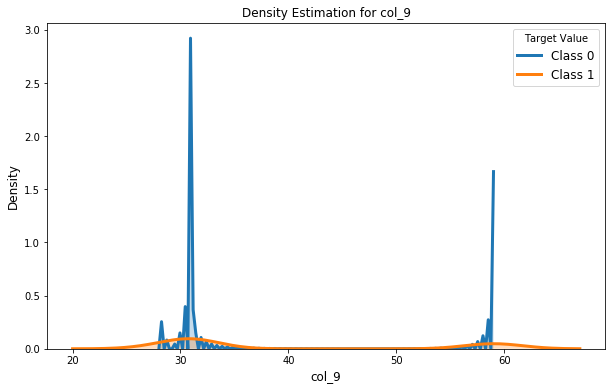

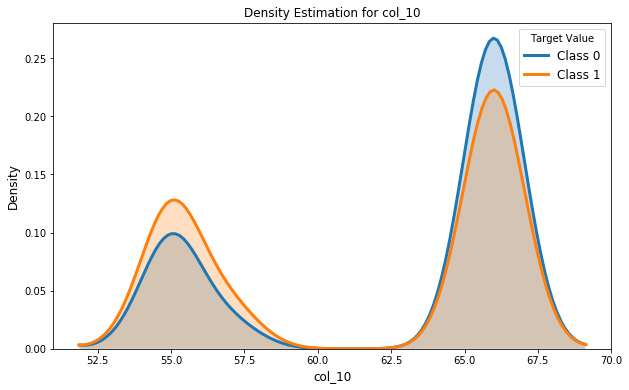

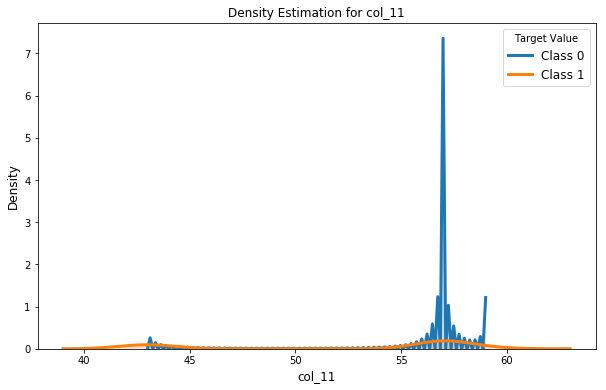

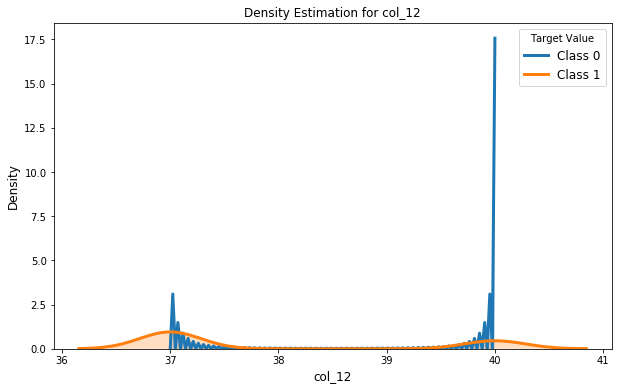

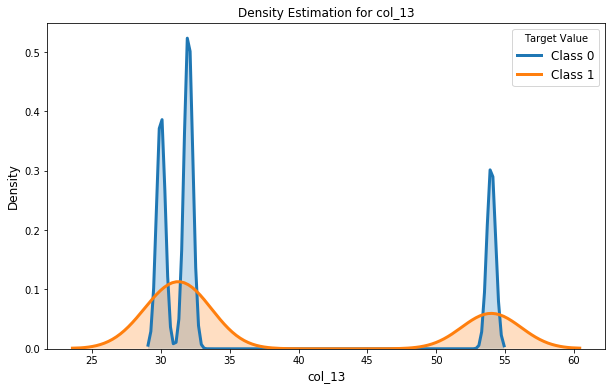

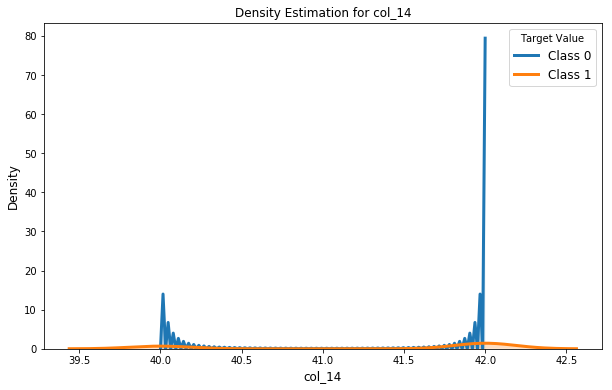

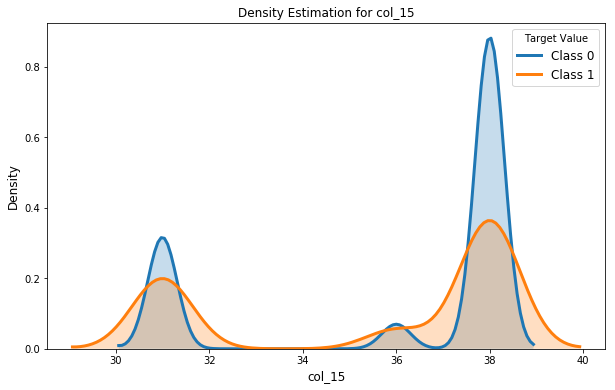

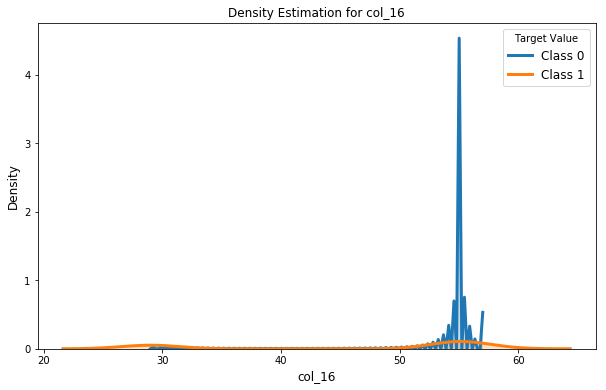

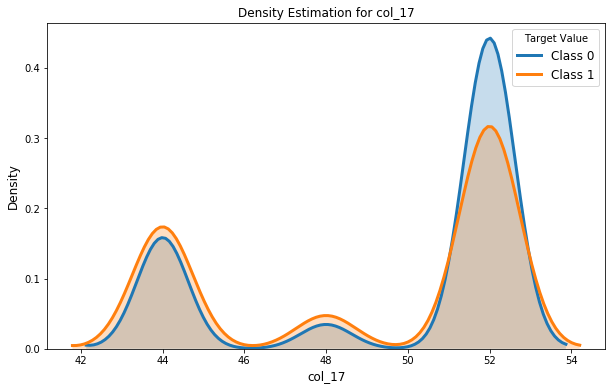

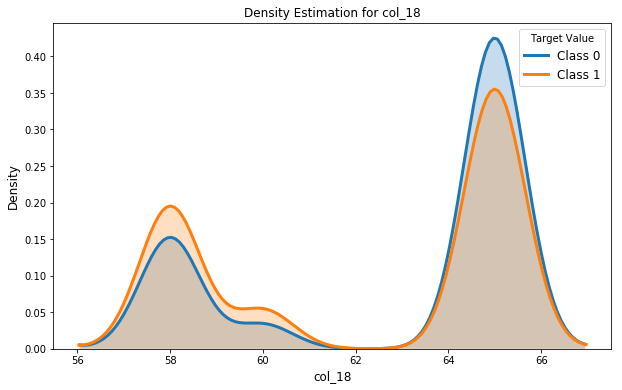

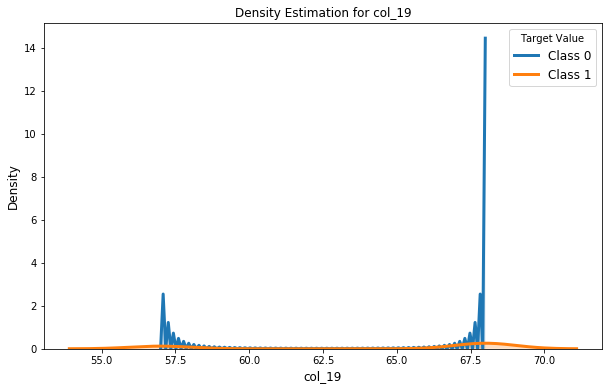

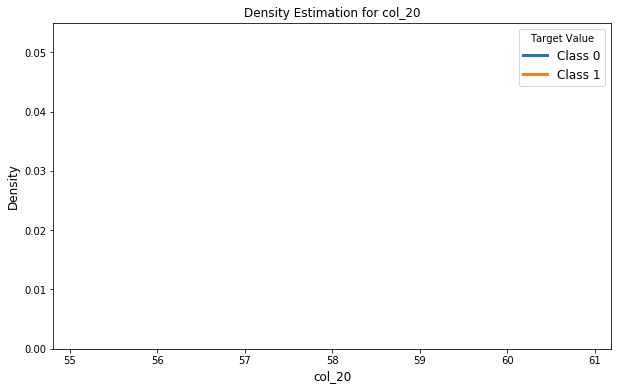

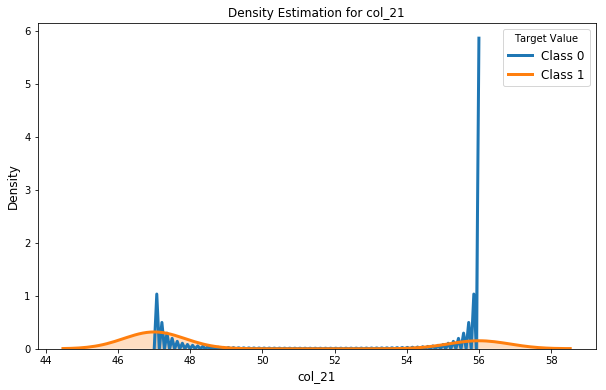

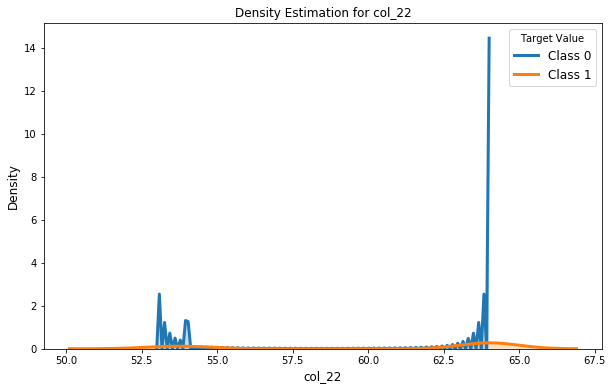

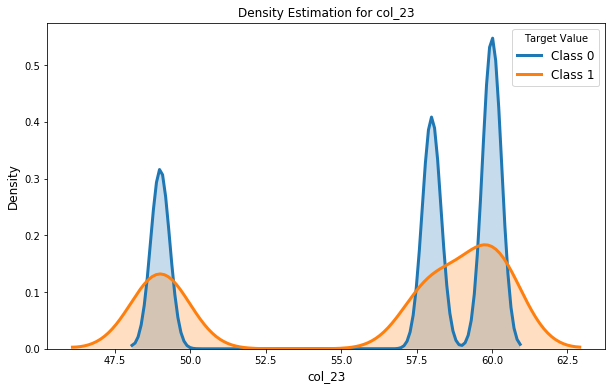

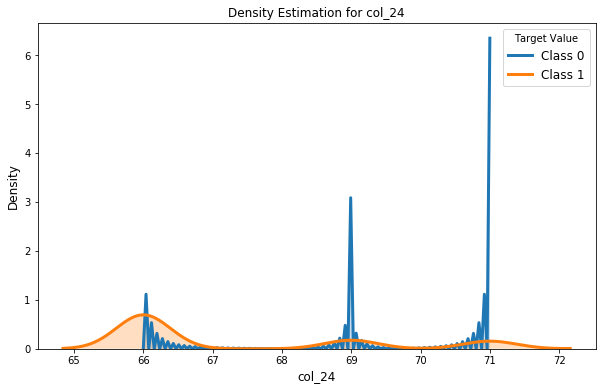

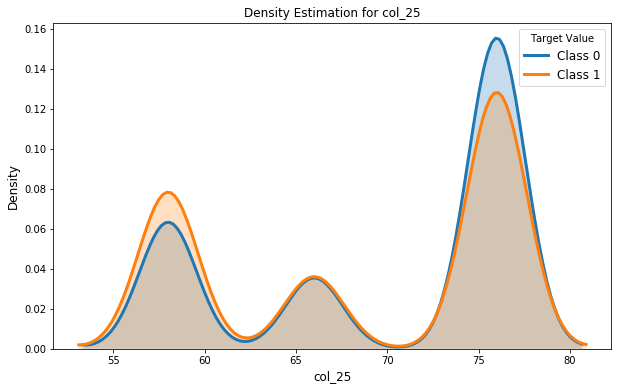

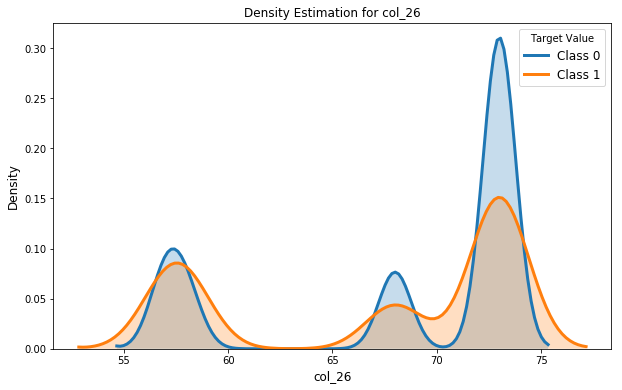

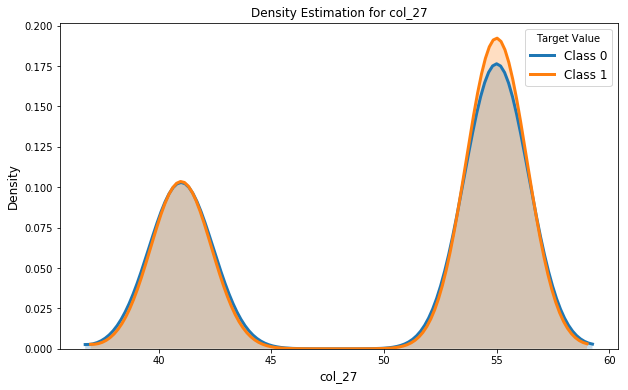

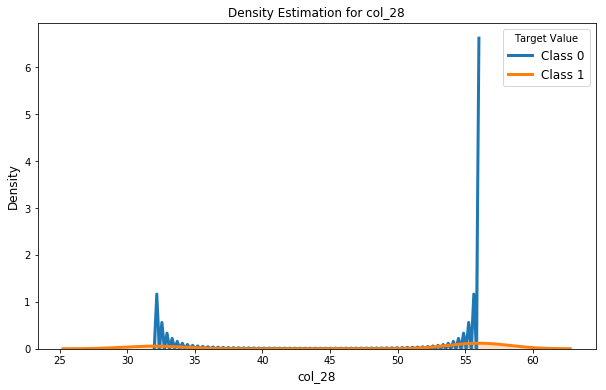

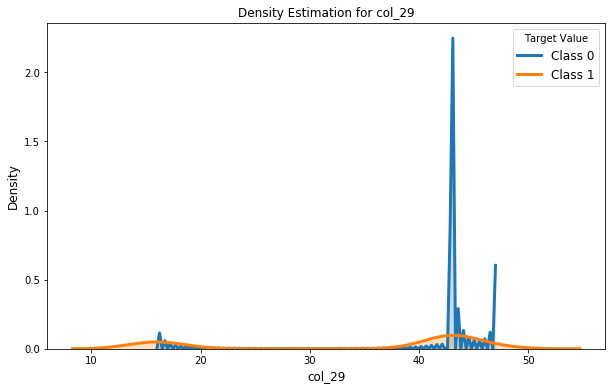

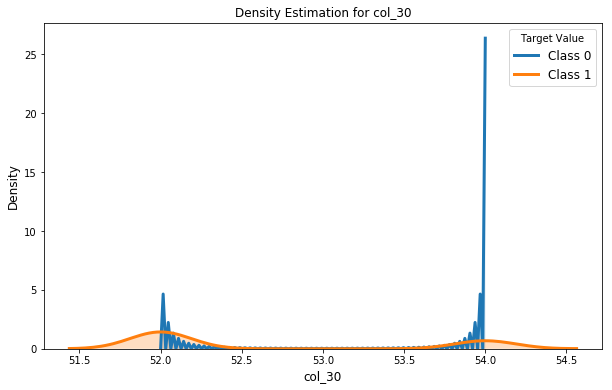

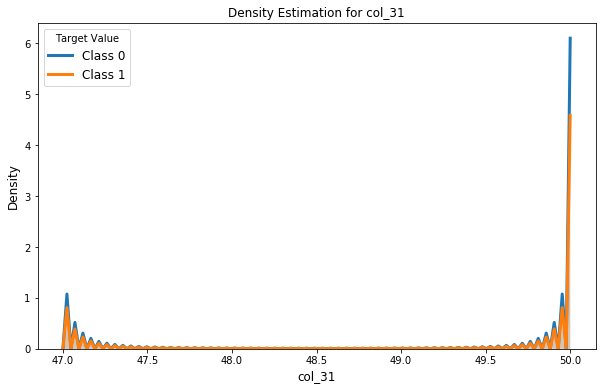

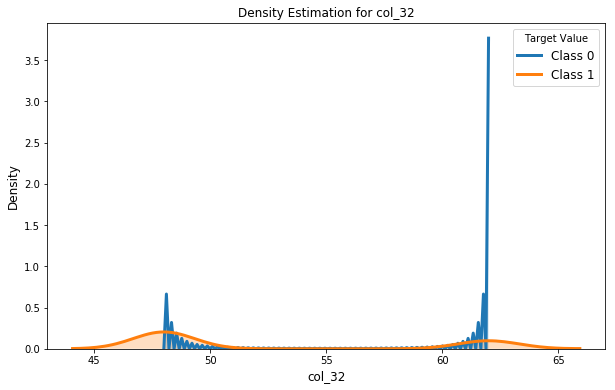

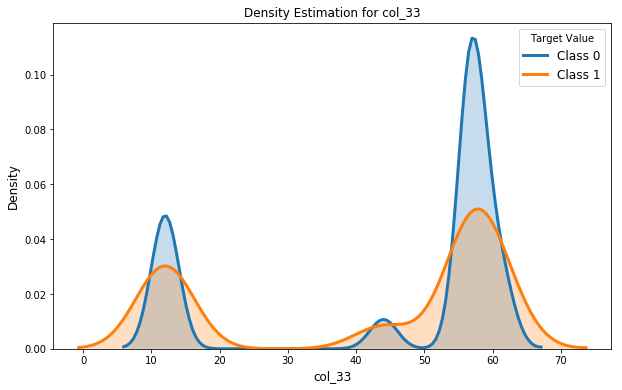

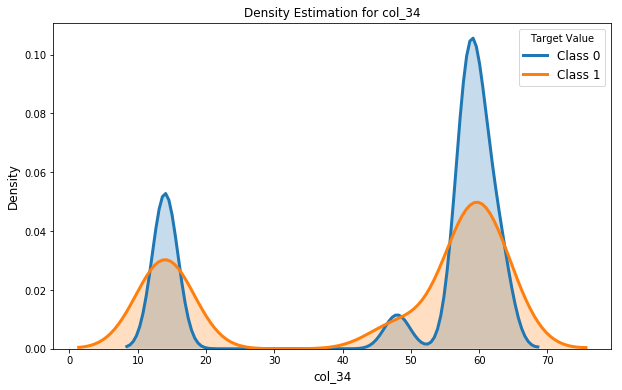

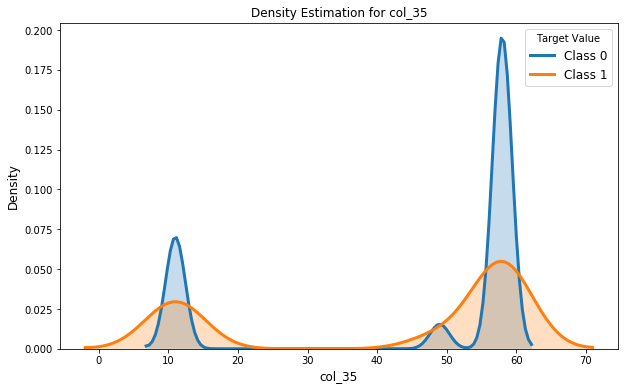

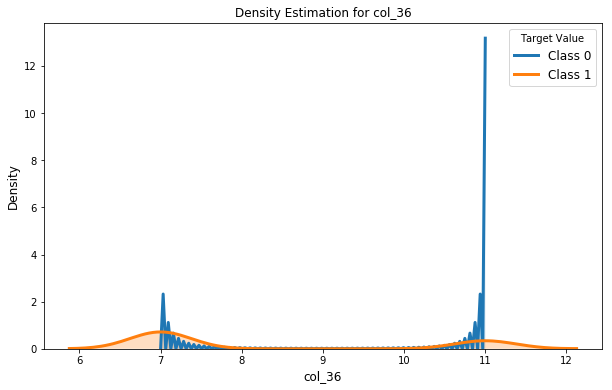

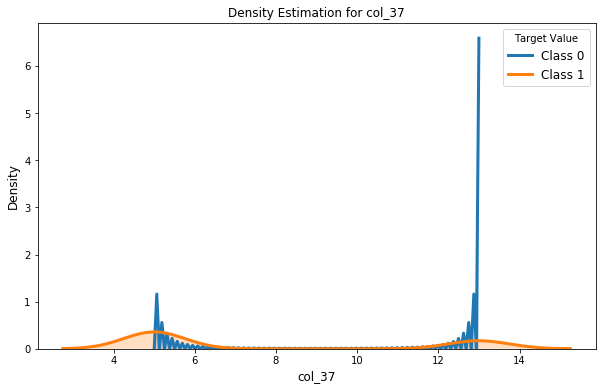

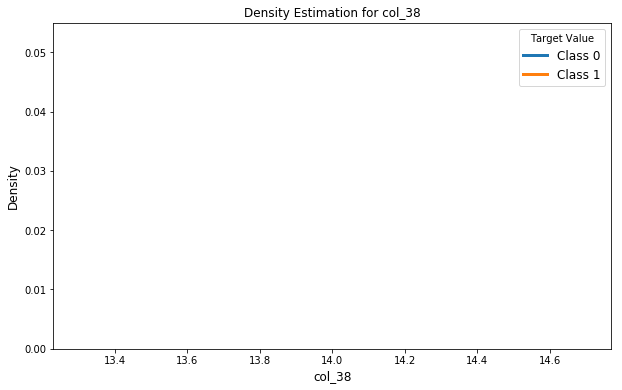

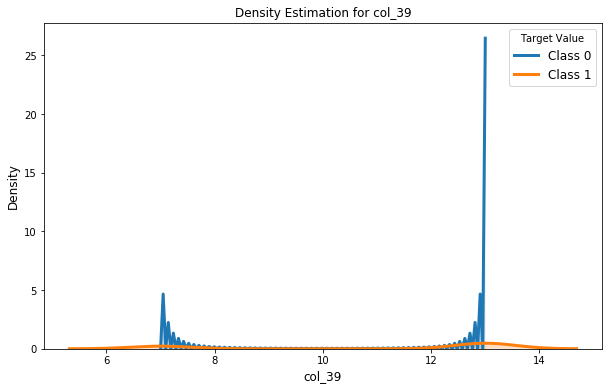

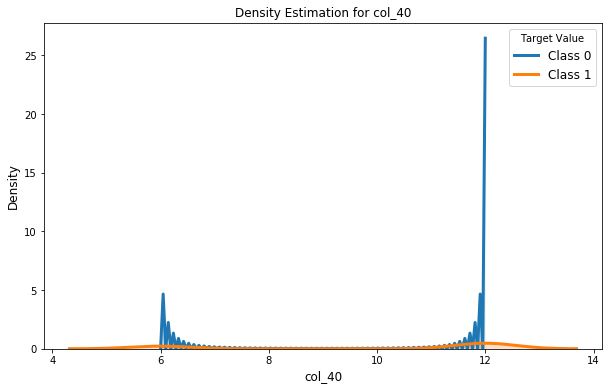

In [17]:
kde_plot(clean_data, target)

In [18]:
target = target[clean_data.index]
target.shape

(7381,)

### EDA - Interpretation 

From the above EDA, we can see that the dataset has shape of  **20854 rows, 42 columns** and has *no missing values* present in the dataset.

There are 41 features and one label column which has only **2 values i.e (0 and 1)**. So, this can be formulated as a binary classification problem.

The above heat map displays the correlation accross the variables and shows that there are multiple variables which have strong correlation among themselves **(i.e. Multicollinearity)**.

Similar interpretation can be derived from the **Box plots and KDE plots**, 
   * Using Box Plots to understand the distribution will provide us insights about the **outliers** present in the variables.
   * For each feature we are checking the distribution based on class wise basis to understand the **most informative feature to separate the classes**.
   * Looks like all the variables have similar kind of distribution for both the classes.
   * Looks like all the variables having class overlapping problem. As, the distribution per class looks similar.

## Preprocessing

**Under this stage, lets divide the dataset into Training, Validation and Testing sets and Normalize them between (0-1) using Min-Max Normalization technique.**

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [20]:
## lets separate the target and create the validation and test splits from the entire dataset...

X_tr, X_test, y_tr, y_test = train_test_split(clean_data, target, test_size=0.2, random_state=seed)

In [21]:
X_tr.shape, y_tr.shape, X_test.shape, y_test.shape

((5904, 41), (5904,), (1477, 41), (1477,))

In [22]:
## lets separate a validation set to be used for fine tuning the parameters and access model performance....

X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.10, random_state=seed)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((5313, 41), (5313,), (591, 41), (591,))

In [23]:
## lets normalize the datasets using min-max normalization.....

mm_scaler = MinMaxScaler(feature_range=(0,1))

## fit the train data..
X_train_mm = mm_scaler.fit_transform(X_train)

## transform the validation and test set..
X_val_mm = mm_scaler.transform(X_val)
X_test_mm = mm_scaler.transform(X_test)

In [24]:
## lets check the shape and values to confirm...
print('Validation dataset shape : %s\nTest Datast Shape : %s' %(X_val_mm.shape, X_test_mm.shape))

Validation dataset shape : (591, 41)
Test Datast Shape : (1477, 41)


In [25]:
X_val_mm[0], X_test_mm[0]

(array([0.33898305, 0.87878788, 0.43859649, 0.40425532, 0.67605634,
        0.21054848, 0.52941176, 0.5       , 0.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.09090909, 0.        , 1.        ,
        0.        , 0.6875    , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        ]),
 array([0.74576271, 0.62121212, 0.35087719, 1.        , 0.52112676,
        0.21054848, 0.52941176, 0.4       , 0.75      , 0.09677419,
        1.        , 0.875     , 0.        , 0.        , 1.        ,
        1.        , 0.92857143, 1.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 0.81818182, 0.        ,
        0.44444444, 0.        , 0.        , 1.        , 0.87096774,
        0.        , 0.    

### Interpretation - Preprocessing

The above set of steps were taken to divide the dataset into **Train, Validate and Test** sets respectively.
The ratio used to split the sets are as follows
   * 70 % for training
   * 20 % for testing
   * 10 % for validation
   
The datasets were then normalized between **(0-1)** range using **Min-Max Normalization** to curb the scale of measurement used to measure the variables.


## Modeling

In [26]:
## Modeling modules...
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier

## Evaluation metrics..
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

C:\Users\uanurag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [27]:
def model_training(model, train_data, train_labels, val_data, val_labels, test_data, test_labels, pred_on_test=True,
                  seed=seed):
    
    """This function takes a model name and respective training, validation and test datasets and provides 
        a evaluation report with Confusion Matrix, Precision, Recall and F1-Score."""
    
    ##create a dict to store the trained models..
    trained_models = []
    
    ## create an instance of the estimator...
    if hasattr(model, 'random_state'):
        model = model(random_state=seed)
    elif hasattr(model, 'seed'):
        model = model(random_state=seed)
    else:
        model = model()
    model_cls = model.__class__
    model_name = str(model_cls).split('.')[-1]
    print('Evaluating << %s >> ............ \n' %model_name)

    ## fit the model....
    model = model.fit(train_data, train_labels)
    trained_models.append(model)
    ## predict using the model...
    y_pred_val = model.predict(val_data)
    print('====== %s Evaluation on Validation Data ======' %model_name, sep='/n/n')
    print('Confusion Matrix \n', confusion_matrix(val_labels, y_pred_val))
    print('Accuracy : ', accuracy_score(val_labels, y_pred_val))
    print('\nClassification Report \n', classification_report(val_labels, y_pred_val))

    ## pred on test data, if args is passed as TRUE..
    if pred_on_test:
        print('====== %s Evaluation on Test Data ======' %model_name, sep='/n')
        y_pred_ts = model.predict(test_data)
        print('Confusion Matrix \n', confusion_matrix(test_labels, y_pred_ts))
        print('Accuracy : ', accuracy_score(test_labels, y_pred_ts))
        print('\nClassification Report \n\n', classification_report(test_labels, y_pred_ts))

    return trained_models

In [28]:
## plot feature importance...
def feature_importance(model):
    
    """Plots the feature importance in a horizontal fashion."""
    
    model_cls = model.__class__
    model_name = str(model_cls).split('.')[-1]
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance for  << %s >> ............ \n' %model_name)
        fig = plt.figure(figsize=(15,8))
        feat_names = [col for col in data_columns if col != 'col_41']
        pd.Series(model.feature_importances_, index=feat_names).sort_values(ascending=False).plot(kind='barh', \
                                                                             title='Feature Importance for %s' %model_name)

In [29]:
## let's create a list of classifiers and check their performance measures in detail.....

model_lookup = dict(dt=DecisionTreeClassifier, rf=RandomForestClassifier,
                    gbm=GradientBoostingClassifier, xgb=XGBClassifier,
                    nn=MLPClassifier)

In [30]:
all_models = []

for model in model_lookup.keys():
    temp = model_training(model_lookup[model], X_train_mm, y_train, X_val_mm, y_val, X_test_mm, y_test)
    all_models.append(temp)

Evaluating << DecisionTreeClassifier'> >> ............ 

====== DecisionTreeClassifier'> Evaluation on Validation Data ======
Confusion Matrix 
 [[138 124]
 [164 165]]
Accuracy :  0.5126903553299492

Classification Report 
              precision    recall  f1-score   support

          0       0.46      0.53      0.49       262
          1       0.57      0.50      0.53       329

avg / total       0.52      0.51      0.51       591

====== DecisionTreeClassifier'> Evaluation on Test Data ======
Confusion Matrix 
 [[356 290]
 [385 446]]
Accuracy :  0.5429925524712255

Classification Report 

              precision    recall  f1-score   support

          0       0.48      0.55      0.51       646
          1       0.61      0.54      0.57       831

avg / total       0.55      0.54      0.54      1477

Evaluating << RandomForestClassifier'> >> ............ 

====== RandomForestClassifier'> Evaluation on Validation Data ======
Confusion Matrix 
 [[121 141]
 [139 190]]
Accuracy :  0.52

C:\Users\uanurag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\uanurag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



====== XGBClassifier'> Evaluation on Validation Data ======
Confusion Matrix 
 [[114 148]
 [104 225]]
Accuracy :  0.5736040609137056

Classification Report 
              precision    recall  f1-score   support

          0       0.52      0.44      0.48       262
          1       0.60      0.68      0.64       329

avg / total       0.57      0.57      0.57       591

====== XGBClassifier'> Evaluation on Test Data ======
Confusion Matrix 
 [[268 378]
 [229 602]]
Accuracy :  0.5890318212593094

Classification Report 

              precision    recall  f1-score   support

          0       0.54      0.41      0.47       646
          1       0.61      0.72      0.66       831

avg / total       0.58      0.59      0.58      1477

Evaluating << MLPClassifier'> >> ............ 

====== MLPClassifier'> Evaluation on Validation Data ======
Confusion Matrix 
 [[  5 257]
 [  9 320]]
Accuracy :  0.5499153976311336

Classification Report 
              precision    recall  f1-score   support


Feature Importance for  << DecisionTreeClassifier'> >> ............ 

Feature Importance for  << RandomForestClassifier'> >> ............ 

Feature Importance for  << GradientBoostingClassifier'> >> ............ 

Feature Importance for  << XGBClassifier'> >> ............ 



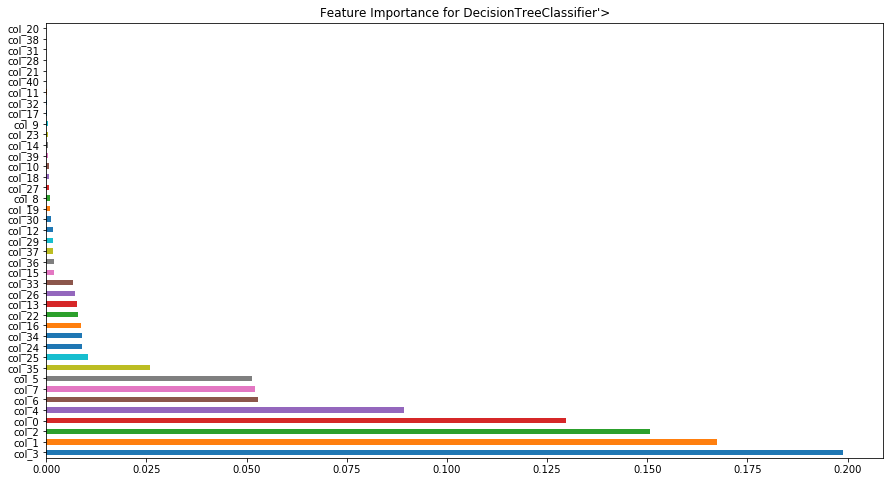

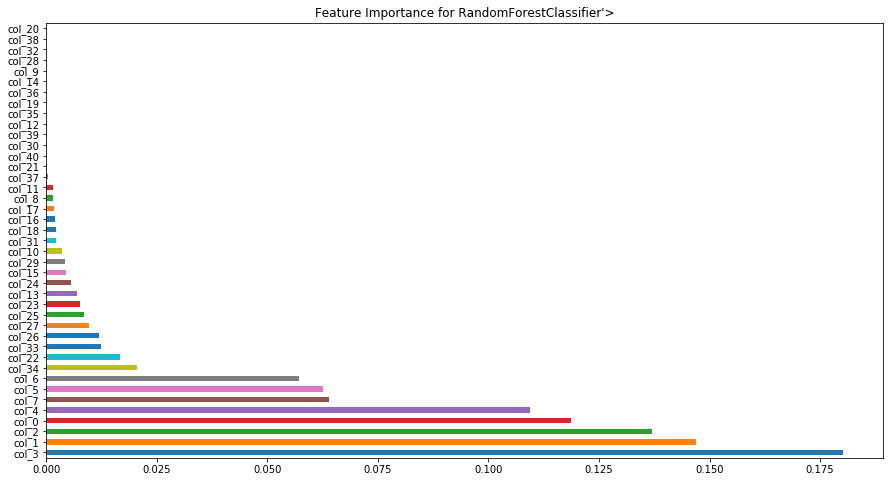

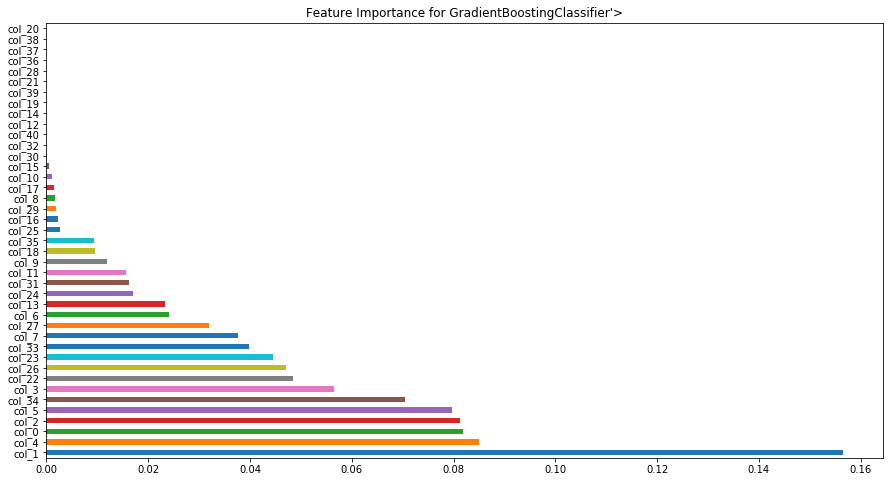

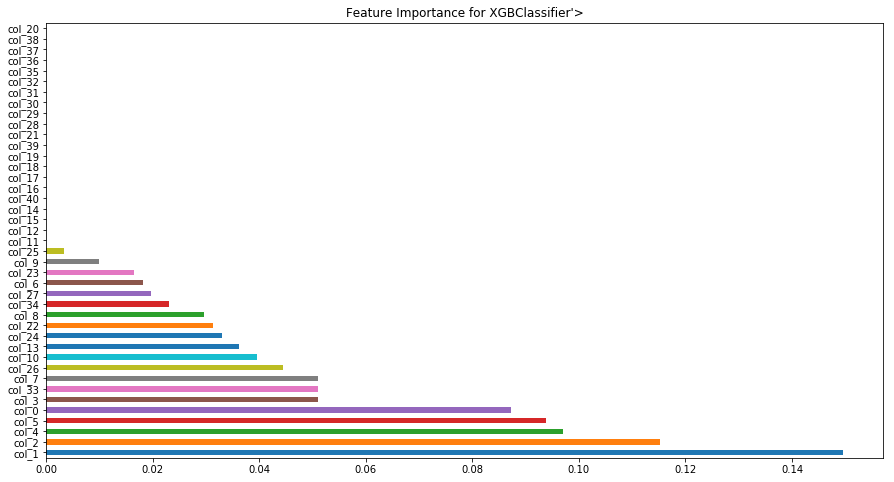

In [31]:
for model in all_models:
    feature_importance(model[0])

## Dimension Reduction - PCA

In [32]:
## lets try dimension reduction.....

from sklearn.decomposition import PCA, FastICA

In [33]:
for component in range(4, 20, 2):
    print('Number of Components : ', component)
    pca = PCA(n_components=component)
    pca.fit(X_train_mm)
    print('Explained Variance Ratio : ', sum(pca.explained_variance_ratio_))

Number of Components :  4
Explained Variance Ratio :  0.9486028058811465
Number of Components :  6
Explained Variance Ratio :  0.9679359616917923
Number of Components :  8
Explained Variance Ratio :  0.9818817409273983
Number of Components :  10
Explained Variance Ratio :  0.9916109979789721
Number of Components :  12
Explained Variance Ratio :  0.9959138042300776
Number of Components :  14
Explained Variance Ratio :  0.9995871480188979
Number of Components :  16
Explained Variance Ratio :  0.9999518696083081
Number of Components :  18
Explained Variance Ratio :  0.9999999999999997


In [34]:
## lets use the number of component's that are providing a good variance...lets use 22 for now...

pca = FastICA(n_components=10, random_state=seed)
X_train_pca = pca.fit_transform(X_train_mm)
X_val_pca = pca.transform(X_val_mm)
X_test_pca = pca.transform(X_test_mm)

In [35]:
for model in model_lookup.keys():
    model_training(model_lookup[model], X_train_pca, y_train, X_val_pca, y_val, X_test_pca, y_test)

Evaluating << DecisionTreeClassifier'> >> ............ 

====== DecisionTreeClassifier'> Evaluation on Validation Data ======
Confusion Matrix 
 [[148 114]
 [165 164]]
Accuracy :  0.5279187817258884

Classification Report 
              precision    recall  f1-score   support

          0       0.47      0.56      0.51       262
          1       0.59      0.50      0.54       329

avg / total       0.54      0.53      0.53       591

====== DecisionTreeClassifier'> Evaluation on Test Data ======
Confusion Matrix 
 [[342 304]
 [383 448]]
Accuracy :  0.5348679756262694

Classification Report 

              precision    recall  f1-score   support

          0       0.47      0.53      0.50       646
          1       0.60      0.54      0.57       831

avg / total       0.54      0.53      0.54      1477

Evaluating << RandomForestClassifier'> >> ............ 

====== RandomForestClassifier'> Evaluation on Validation Data ======
Confusion Matrix 
 [[119 143]
 [137 192]]
Accuracy :  0.52

C:\Users\uanurag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\uanurag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



====== XGBClassifier'> Evaluation on Validation Data ======
Confusion Matrix 
 [[100 162]
 [ 95 234]]
Accuracy :  0.5651438240270727

Classification Report 
              precision    recall  f1-score   support

          0       0.51      0.38      0.44       262
          1       0.59      0.71      0.65       329

avg / total       0.56      0.57      0.55       591

====== XGBClassifier'> Evaluation on Test Data ======
Confusion Matrix 
 [[252 394]
 [220 611]]
Accuracy :  0.5842924847664184

Classification Report 

              precision    recall  f1-score   support

          0       0.53      0.39      0.45       646
          1       0.61      0.74      0.67       831

avg / total       0.58      0.58      0.57      1477

Evaluating << MLPClassifier'> >> ............ 

====== MLPClassifier'> Evaluation on Validation Data ======
Confusion Matrix 
 [[ 13 249]
 [ 24 305]]
Accuracy :  0.5380710659898477

Classification Report 
              precision    recall  f1-score   support
